<img src="https://www.usnews.com/object/image/0000016d-8dc8-dc08-a77f-8fcf81610000/191002-volatility-stock.jpg?update-time=1570041890247&size=responsive640">


## **Predicting the S&P500 Index** 
#### By Ori Nissim, Stanislav Libman, Noam Kimhi

## **Introduction**
### In this project we will be using:
* Technical data &  Indicators
* Sentiment from news articles
* Fundamental Data of the companies that lead the world
* Data about the trades of the biggest Investors
### In order to predict the direction of the S&P500 Index, Which represents the economy and give recommendation for actions to maximize the return.

## **Table of Contents**
1  [ Getting the data](#scrollTo=pcnNsWg0gghR&line=3&uniqifier=1)
### Technical Data Model
2.1  [ Adding Technical Data to the Data frame](#scrollTo=TITkGBWHuVur&line=1&uniqifier=1)

2.2 [Data Cleaning](#scrollTo=_bb4Mwe2g1Et&line=1&uniqifier=1)

2.3 [Handling missing values](#scrollTo=_bb4Mwe2g1Et)

2.4 [Models & Predictions](#scrollTo=FWbxPmtIL_42&line=1&uniqifier=1)

2.5 [Model profits according to the Recommendations](#scrollTo=g9kBqKFug4is&line=1&uniqifier=1)

### Fundamental Data Model
3.1 [Getting the Fundamental Data](#scrollTo=7M_SDFUXNBER&line=1&uniqifier=1)

3.2 [Data Cleaning](#scrollTo=01ZPTGKaEKxr&line=1&uniqifier=1)

3.3 [Handling missing values](#scrollTo=dRepAMXWEOng&line=1&uniqifier=1)

3.4 [Models & Predictions]()

3.5 [Model profits according to the Recommendations](#scrollTo=g9kBqKFug4is&line=1&uniqifier=1)


### News Sentiment Data Model
4.1 [Getting the News Data](#scrollTo=asFE7vY-EjWA&line=2&uniqifier=1)

4.2 [Data Cleaning](#scrollTo=T0gJlqBCEjWB)

4.3 [Handling missing values](#scrollTo=FWbxPmtIL_42&line=1&uniqifier=1)

4.4 [Models & Predictions](#scrollTo=RXDrFaKoETbh&line=1&uniqifier=1)

4.5 [Model profits according to the Recommendations](#scrollTo=hoDhFh2hEIah&line=1&uniqifier=1)


### Investors trades Data Model
4.2 [Getting the trades data](#scrollTo=_bb4Mwe2g1Et&line=1&uniqifier=1)

4.2 [Data Cleaning](#scrollTo=_bb4Mwe2g1Et&line=1&uniqifier=1)

4.3 [Handling missing values](#scrollTo=zAZZoJzXrRN7&line=2&uniqifier=1)

4.4 [Models & Predictions](#scrollTo=FWbxPmtIL_42&line=1&uniqifier=1)

4.5 [Model profits according to the Recommendations](#scrollTo=g9kBqKFug4is&line=1&uniqifier=1)


### Combining all models
5 [Results & Model profits according to the Recommendations](#scrollTo=g9kBqKFug4is&line=1&uniqifier=1)





### **Getting the Data**
* Yahoo!Finance API in order to get the Financial data 
* New York Times API to get the news in an organized format

In [ ]:
num_of_days = -500 # this variable determines how many days we look back when calculating the return - every 250 days are a year of trading

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### How to use the API:
https://github.com/ranaroussi/yfinance

## **Walk through the API - Example of Microsoft stock data**




In [ ]:
import yfinance as yf
msft = yf.Ticker("MSFT")
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055241,0.063365,0.055241,0.060657,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060657,0.063906,0.060657,0.062823,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062823,0.064448,0.062823,0.063907,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063907,0.064448,0.061740,0.062281,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062281,0.062823,0.060657,0.061198,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,289.209991,289.600006,284.709991,289.390015,23103000,0.0,0.0
2023-04-11 00:00:00-04:00,285.750000,285.980011,281.640015,282.829987,27276600,0.0,0.0
2023-04-12 00:00:00-04:00,284.790009,287.010010,281.959991,283.489990,27403400,0.0,0.0


## Let's plot the data on a graph with **matplotlib**

## We'll write a function to plot graphs to reduce code repetition


In [ ]:
def show_graph(data,title,color):
  plt.figure(figsize=(20,10))
  plt.plot(data,color)

  plt.title(title)
  plt.grid()
  plt.show()

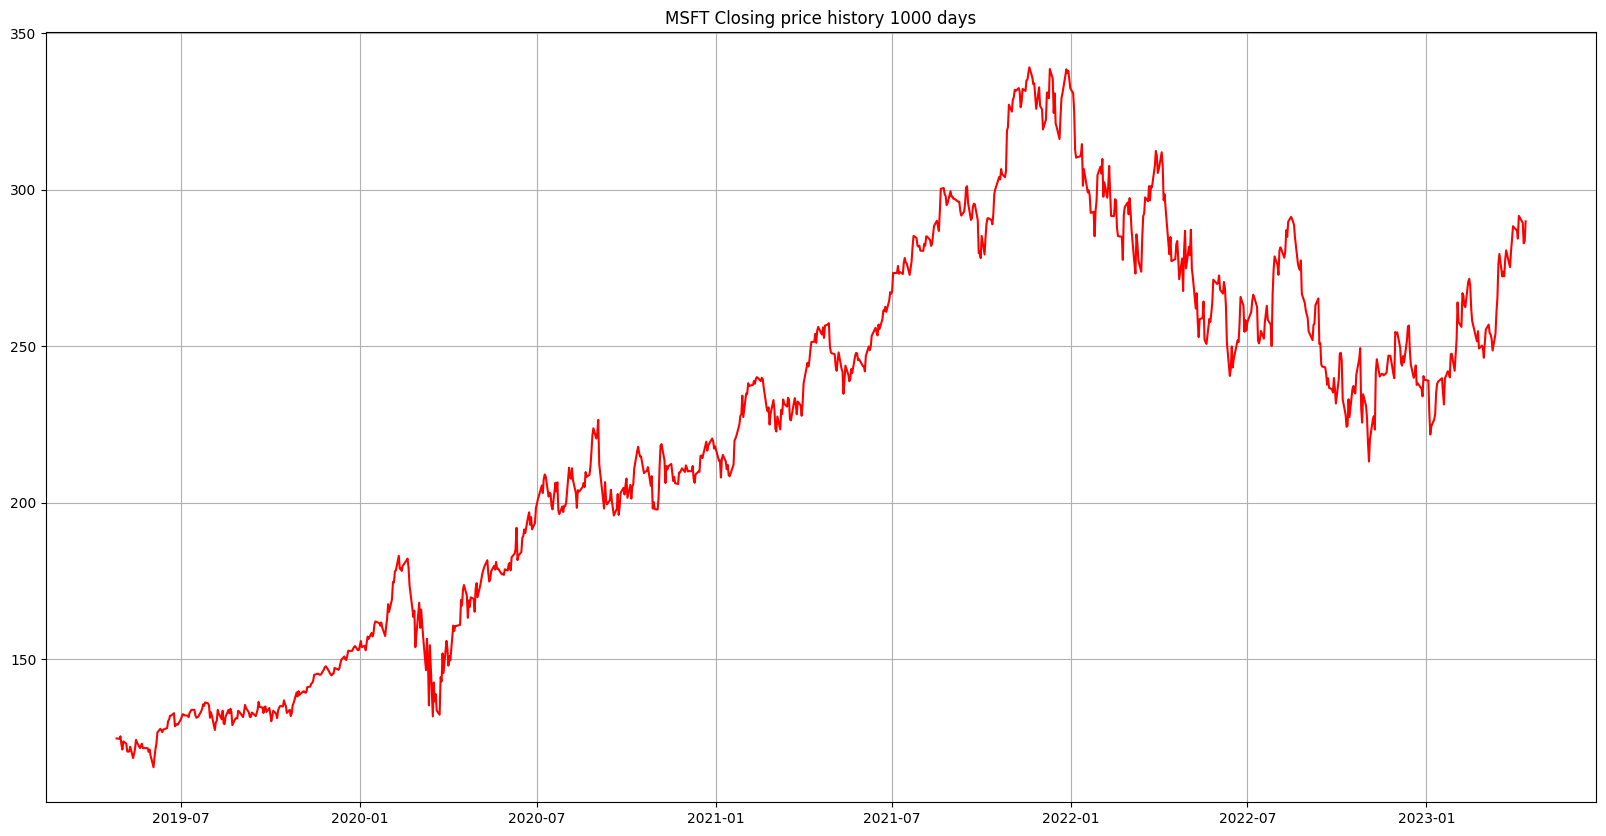

In [ ]:
 close_msft = hist["Close"][-1000:-1]
 
show_graph(close_msft , "MSFT Closing price history 1000 days",'red')

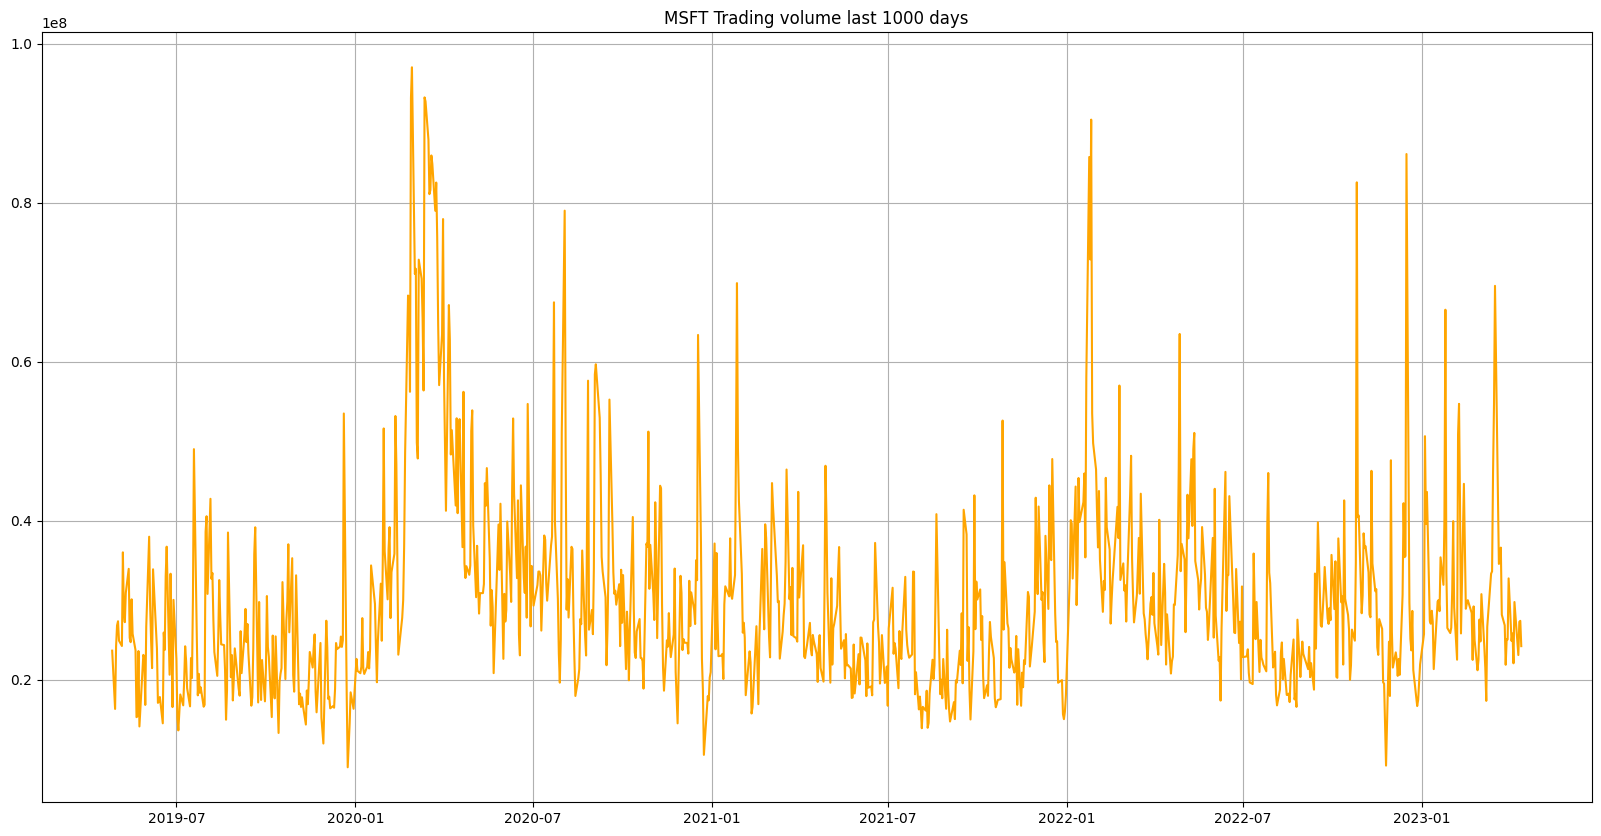

In [ ]:
vol_msft = hist["Volume"][-1000:-1]

show_graph(vol_msft , "MSFT Trading volume last 1000 days",'orange')


### Turns out the api is **not** official from Yahoo!Finance and it is an open-source api, for some reason only certain functions work. The official API is discountinued due to violation of the terms by many users.
### We will gather the rest of the data from ***Alpha Vantage***.

## Consider Profit/risk ratio on model metrics








# **Technical Data**
## After Seeing those examples, let's get the data we need
### Starting with the technical data, we will be working with:
* CCI
* MACDH 
* RSI 
* KDJ 
* WR - The Williams %R index
* ATR - The Average True Range
*CMF The Chaikin Money Flow 
* VIX - Market volatility index


## VIX has a ticker so it will be generated easily, the rest will have to be calculated on the S&P index data.

In [ ]:
vix = yf.Ticker("UVXY")
vix_hist = vix.history(period="max")
vix_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2011-10-04 00:00:00-04:00,2.427000e+09,2.448000e+09,2.058000e+09,2.058000e+09,0,0.0,0.0,0.0
2011-10-05 00:00:00-04:00,1.974600e+09,1.989000e+09,1.813800e+09,1.813800e+09,0,0.0,0.0,0.0
2011-10-06 00:00:00-04:00,1.811400e+09,1.878000e+09,1.740000e+09,1.740000e+09,0,0.0,0.0,0.0
2011-10-07 00:00:00-04:00,1.705800e+09,1.857600e+09,1.684800e+09,1.765200e+09,0,0.0,0.0,0.0
2011-10-10 00:00:00-04:00,1.654800e+09,1.656000e+09,1.559400e+09,1.559400e+09,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,4.490000e+00,4.510000e+00,4.300000e+00,4.340000e+00,38699100,0.0,0.0,0.0
2023-04-11 00:00:00-04:00,4.270000e+00,4.320000e+00,4.180000e+00,4.280000e+00,39321100,0.0,0.0,0.0
2023-04-12 00:00:00-04:00,4.160000e+00,4.360000e+00,4.120000e+00,4.310000e+00,60582800,0.0,0.0,0.0


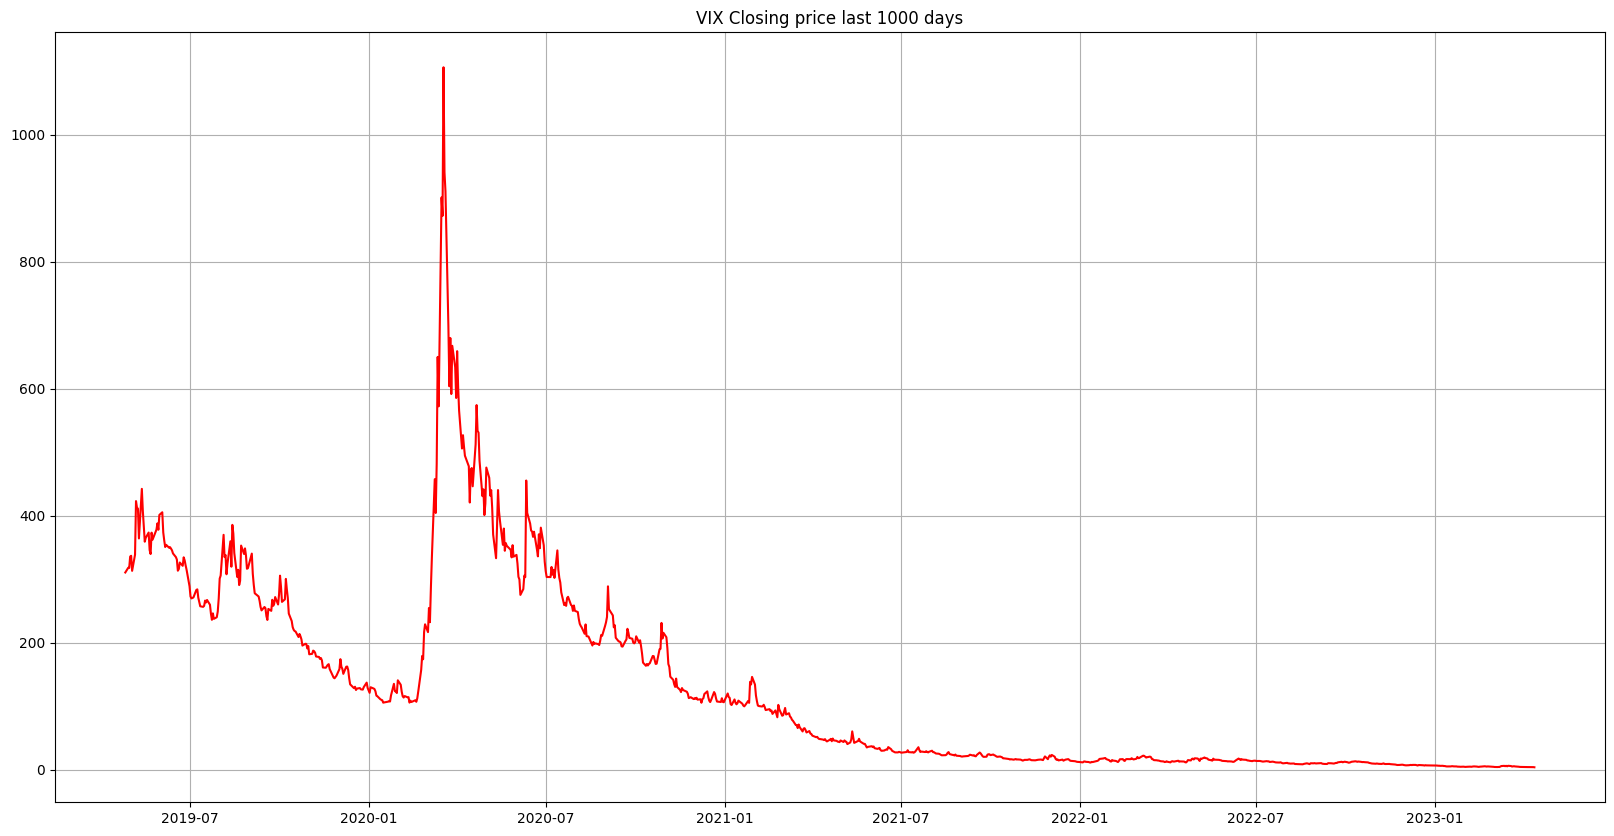

In [ ]:
vix_close = vix_hist["Close"][-1000:-1]
show_graph(vix_close , "VIX Closing price last 1000 days",'red')

## To calculate the indicators we will need the S&P500 data
### The index data is not available to us so we will be using the SPY instead
### SPY is an ETF - Exchange Traded Fund (קרן סל)  that follows the S&P500 index

In [ ]:
snp = yf.Ticker("SPY")
spy_data = snp.history(period="max")
spy_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
1993-01-29 00:00:00-05:00,25.140234,25.140234,25.015158,25.122366,1003200,0.0,0.0,0.0
1993-02-01 00:00:00-05:00,25.140216,25.301027,25.140216,25.301027,480500,0.0,0.0,0.0
1993-02-02 00:00:00-05:00,25.283150,25.372490,25.229546,25.354622,201300,0.0,0.0,0.0
1993-02-03 00:00:00-05:00,25.390365,25.640516,25.372497,25.622648,529400,0.0,0.0,0.0
1993-02-04 00:00:00-05:00,25.711992,25.783464,25.426105,25.729860,531500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,0.0,0.0,0.0
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,0.0,0.0,0.0
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,0.0,0.0,0.0


## Example of fetching same data type but from Alpha vantage


In [ ]:
import requests

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SPY&outputsize=full&apikey=Q3O7HGS7ZPJSNRNL&datatype=csv"

spy_data_alpha = pd.read_csv(url)


In [ ]:
spy_data_alpha

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2023-04-14,412.810000,415.090000,410.060000,412.460000,412.460000,78161500,0.0,1.0
1,2023-04-13,409.180000,413.840000,407.992200,413.470000,413.470000,85814754,0.0,1.0
2,2023-04-12,411.870000,412.170000,407.440000,408.050000,408.050000,86420379,0.0,1.0
3,2023-04-11,410.260000,411.180000,408.920000,409.720000,409.720000,59297945,0.0,1.0
4,2023-04-10,406.610000,409.690000,405.970000,409.610000,409.610000,63681042,0.0,1.0
...,...,...,...,...,...,...,...,...,...
5896,1999-11-05,138.625000,139.109299,136.781204,137.875000,89.722043,7431500,0.0,1.0
5897,1999-11-04,136.750000,137.359299,135.765594,136.531204,88.847568,7907500,0.0,1.0
5898,1999-11-03,136.000000,136.375000,135.125000,135.500000,88.176513,7222300,0.0,1.0
5899,1999-11-02,135.968704,137.250000,134.593704,134.593704,87.586742,6516900,0.0,1.0


### We can see ***yfinance*** contains more rows - meaning it **cotains data over a longer period of time**, hence we will use it for calulating the indicator

In [ ]:
# Add VIX to the dataframe
spy_data['vix'] = vix_hist['Close']
spy_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,vix
Date,,,,,,,,,
1993-01-29 00:00:00-05:00,25.140234,25.140234,25.015158,25.122366,1003200,0.0,0.0,0.0,NaN
1993-02-01 00:00:00-05:00,25.140216,25.301027,25.140216,25.301027,480500,0.0,0.0,0.0,NaN
1993-02-02 00:00:00-05:00,25.283150,25.372490,25.229546,25.354622,201300,0.0,0.0,0.0,NaN
1993-02-03 00:00:00-05:00,25.390365,25.640516,25.372497,25.622648,529400,0.0,0.0,0.0,NaN
1993-02-04 00:00:00-05:00,25.711992,25.783464,25.426105,25.729860,531500,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,0.0,0.0,0.0,4.34
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,0.0,0.0,0.0,4.28
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,0.0,0.0,0.0,4.31


### **VIX index contains many missing values as it starts in 2011, we will fill these values later**

## CCI The Commodity Channel Index can help to identify price reversals, price extremes and trend strength. 20 days

<img src="https://investexcel.net/wp-content/uploads/2016/09/CCI.png"> <img src="https://cdn-amiji.nitrocdn.com/IEZIUgrNRbYQggDlmHBLkLYuABZyJyOL/assets/static/optimized/rev-b9df735/wp-content/uploads/technical-analysis/CCIES.gif">

In [ ]:
# Commodity Channel Index 
def CCI(df, ndays): 
  df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3 
  df['sma'] = df['TP'].rolling(ndays).mean()
  df['mad'] = df['TP'].rolling(ndays).apply(lambda x: pd.Series(x).mad())
  df['CCI'] = (df['TP'] - df['sma']) / (0.015 * df['mad']) 
  return df


In [ ]:
new_spy = CCI(spy_data,20)

<ipython-input-14-3dfabff85fe5>:5: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df['mad'] = df['TP'].rolling(ndays).apply(lambda x: pd.Series(x).mad())


In [ ]:
new_spy.head(50)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,vix,TP,sma,mad,CCI
Date,,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.140234,25.140234,25.015158,25.122366,1003200,0.000,0.0,0.0,NaN,25.092586,NaN,NaN,NaN
1993-02-01 00:00:00-05:00,25.140216,25.301027,25.140216,25.301027,480500,0.000,0.0,0.0,NaN,25.247423,NaN,NaN,NaN
1993-02-02 00:00:00-05:00,25.283150,25.372490,25.229546,25.354622,201300,0.000,0.0,0.0,NaN,25.318886,NaN,NaN,NaN
1993-02-03 00:00:00-05:00,25.390365,25.640516,25.372497,25.622648,529400,0.000,0.0,0.0,NaN,25.545220,NaN,NaN,NaN
1993-02-04 00:00:00-05:00,25.711992,25.783464,25.426105,25.729860,531500,0.000,0.0,0.0,NaN,25.646476,NaN,NaN,NaN
1993-02-05 00:00:00-05:00,25.712000,25.765604,25.569056,25.712000,492100,0.000,0.0,0.0,NaN,25.682220,NaN,NaN,NaN
1993-02-08 00:00:00-05:00,25.712000,25.801340,25.676264,25.712000,596100,0.000,0.0,0.0,NaN,25.729868,NaN,NaN,NaN
1993-02-09 00:00:00-05:00,25.622654,25.622654,25.479710,25.533314,122100,0.000,0.0,0.0,NaN,25.545226,NaN,NaN,NaN
1993-02-10 00:00:00-05:00,25.533299,25.586903,25.461827,25.569035,379600,0.000,0.0,0.0,NaN,25.539255,NaN,NaN,NaN


In [ ]:
new_spy.drop(["mad","sma","TP","Capital Gains","Stock Splits","Dividends"], axis = 1, inplace = True)

In [ ]:
new_spy

,Open,High,Low,Close,Volume,vix,CCI
Date,,,,,,,
1993-01-29 00:00:00-05:00,25.140234,25.140234,25.015158,25.122366,1003200,NaN,NaN
1993-02-01 00:00:00-05:00,25.140216,25.301027,25.140216,25.301027,480500,NaN,NaN
1993-02-02 00:00:00-05:00,25.283150,25.372490,25.229546,25.354622,201300,NaN,NaN
1993-02-03 00:00:00-05:00,25.390365,25.640516,25.372497,25.622648,529400,NaN,NaN
1993-02-04 00:00:00-05:00,25.711992,25.783464,25.426105,25.729860,531500,NaN,NaN
...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991


# **MACD -The Moving Average Convergence Divergence**
### EMA - Exponential Moving Average
### **MACD = 12 days Period EMA − 26 days Period EMA**
<img src="https://dnpgic06wp5lx.cloudfront.net/blog/20200105-142841_macd_example.png">


 First we need to install **Pandas Technical Analysis** so we can use its functions


In [ ]:
pip install pandas-ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=5489933b010101f4dab806822229646ee86c9a781dfd705e5326425f763a2479
  Stored in directory: /root/.cache/pip/wheels/1e/5c/47/759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas-ta


In [ ]:
import pandas_ta as ta

In [ ]:
 # Calculate MACD values using the pandas_ta library
macd =spy_data.ta.macd(close='close', fast=12, slow=26, signal=9, append=True)

In [ ]:
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
1993-01-29 00:00:00-05:00,NaN,NaN,NaN
1993-02-01 00:00:00-05:00,NaN,NaN,NaN
1993-02-02 00:00:00-05:00,NaN,NaN,NaN
1993-02-03 00:00:00-05:00,NaN,NaN,NaN
1993-02-04 00:00:00-05:00,NaN,NaN,NaN
...,...,...,...
2023-04-10 00:00:00-04:00,3.497679,1.627821,1.869859
2023-04-11 00:00:00-04:00,3.647172,1.421851,2.225321
2023-04-12 00:00:00-04:00,3.589512,1.091353,2.498159


In [ ]:
def plot_macd(prices, macd, signal, hist):
    plt.figure(figsize=(20,10))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')



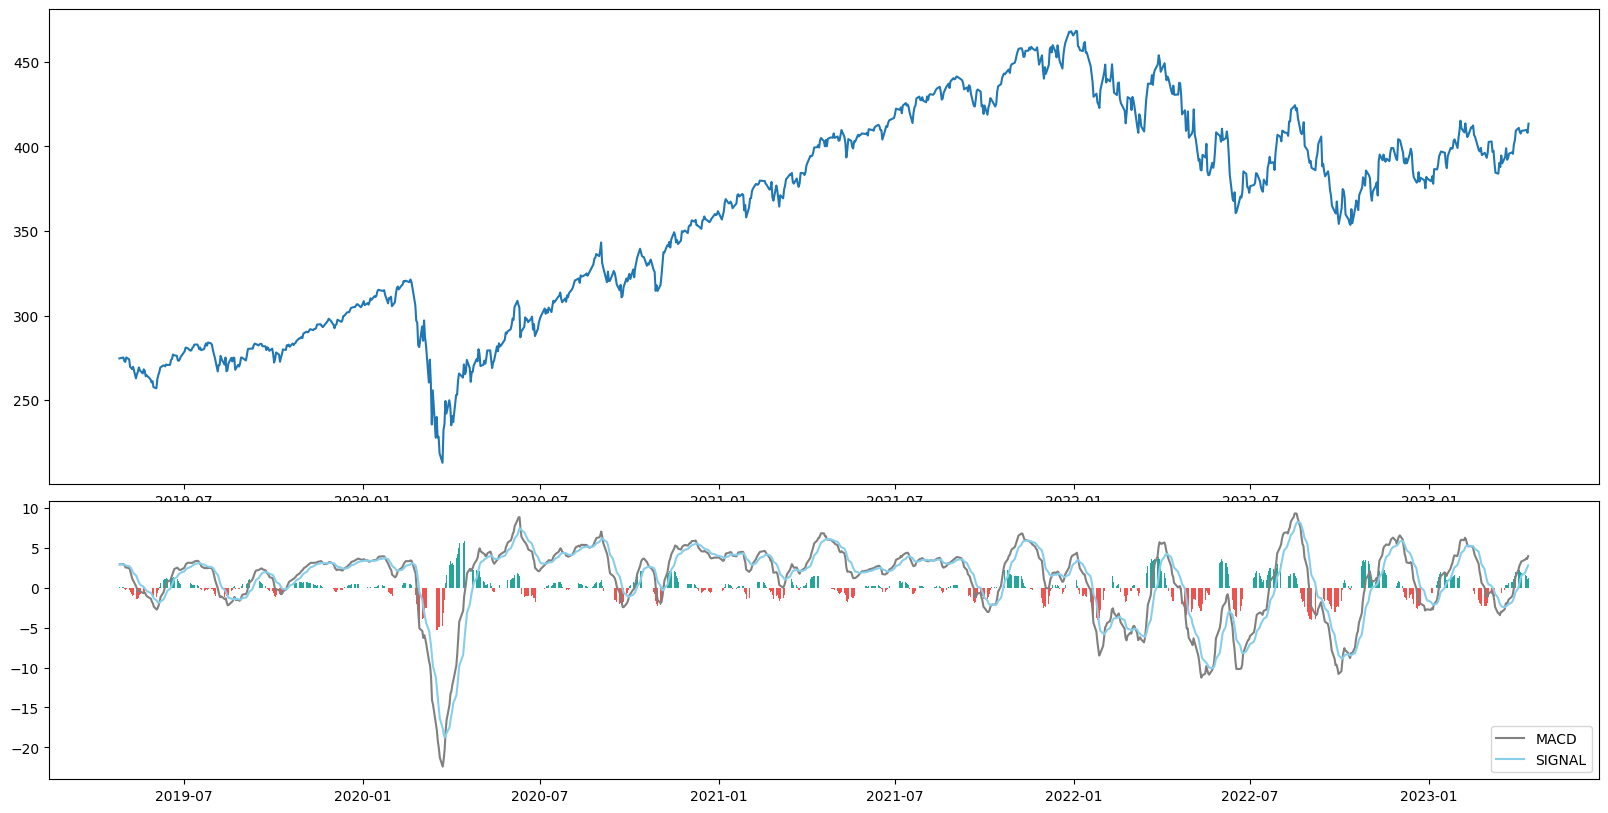

In [ ]:
plot_macd(spy_data['Close'][-1000:-1], macd['MACD_12_26_9'][-1000:-1], macd['MACDs_12_26_9'][-1000:-1], macd['MACDh_12_26_9'][-1000:-1])

# **Calculating RSI** 
## The Relative Strength Index, which measures the average of recent upward movement versus the upward and downward movements combined, in a percentage form.
## 14 days window period
<img src="https://www.alpharithms.com/wp-content/uploads/1674/rsi-formulae-alpharithms.jpg" width="400">

In [ ]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi

In [ ]:
rsi_spy = rsi(spy_data)
spy_data['RSI'] = rsi_spy

In [ ]:
spy_data.tail(10)

,Open,High,Low,Close,Volume,vix,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI
Date,,,,,,,,,,,
2023-03-31 00:00:00-04:00,404.660004,409.700012,404.549988,409.390015,111974600,4.65,181.595888,1.339717,1.923821,-0.584104,62.887589
2023-04-03 00:00:00-04:00,408.850006,411.369995,408.440002,410.950012,67391100,4.46,196.894396,2.221649,2.244603,-0.022954,64.081526
2023-04-04 00:00:00-04:00,411.619995,411.920013,407.239990,408.670013,66601500,4.58,158.295764,2.705423,2.182702,0.522722,60.993094
2023-04-05 00:00:00-04:00,407.910004,408.700012,405.880005,407.600006,65200200,4.52,117.078508,2.968261,1.956431,1.011830,59.542750
2023-04-06 00:00:00-04:00,406.769989,409.480011,405.679993,409.190002,63743300,4.40,108.040959,3.267199,1.804296,1.462903,61.025819
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229,3.497679,1.627821,1.869859,61.428033
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640,3.647172,1.421851,2.225321,61.540001
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991,3.589512,1.091353,2.498159,58.751971
2023-04-13 00:00:00-04:00,409.179993,413.839996,407.989990,413.470001,85814800,4.08,98.119991,3.935797,1.150110,2.785687,64.390558


# While trying to get all technical indicator I came across a library called **stockstats** that is dedicated for calculation those indicator.
## What we need to do is to convert our data to "StockDataFrame" and then just generate new column by passing the indicator name in the brackets.
### example: df["rsi"] will generate a new column in "df" that contains it's RSI signals
### Let's install the package and check that everything works according to the documentation

In [ ]:
pip install stockstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from stockstats import wrap


In [ ]:
spy_data_copy = spy_data.copy()

In [ ]:
spy_data_copy.rename(columns = {'Date':'date', 'Open':'open','Close':'close', 'Volume':'volume', 'High':'high', 'Low':'low'}, inplace = True)


In [ ]:
stockstats_spy= wrap(spy_data_copy)

In [ ]:
stockstats_spy

,open,high,low,close,volume,vix,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi
Date,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.140234,25.140234,25.015158,25.122366,1003200,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01 00:00:00-05:00,25.140216,25.301027,25.140216,25.301027,480500,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02 00:00:00-05:00,25.283150,25.372490,25.229546,25.354622,201300,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-03 00:00:00-05:00,25.390365,25.640516,25.372497,25.622648,529400,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-04 00:00:00-05:00,25.711992,25.783464,25.426105,25.729860,531500,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229,3.497679,1.627821,1.869859,61.428033
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640,3.647172,1.421851,2.225321,61.540001
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991,3.589512,1.091353,2.498159,58.751971


# Works as expected, now we can add the new column

# **WR Williams %R index**
###  Another index for buy signals by measuring the current price in relation to the past N periods. 14 days
<img src="https://cdn-amiji.nitrocdn.com/IEZIUgrNRbYQggDlmHBLkLYuABZyJyOL/assets/static/optimized/rev-b9df735/wp-content/uploads/technical-analysis/WilliamsRQQQQ.gif" height="400">

In [ ]:
wr = stockstats_spy['wr']

In [ ]:
stockstats_spy

,open,high,low,close,volume,vix,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,wr
Date,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.140234,25.140234,25.015158,25.122366,1003200,NaN,NaN,NaN,NaN,NaN,NaN,-14.285714
1993-02-01 00:00:00-05:00,25.140216,25.301027,25.140216,25.301027,480500,NaN,NaN,NaN,NaN,NaN,NaN,-0.000000
1993-02-02 00:00:00-05:00,25.283150,25.372490,25.229546,25.354622,201300,NaN,NaN,NaN,NaN,NaN,NaN,-5.000382
1993-02-03 00:00:00-05:00,25.390365,25.640516,25.372497,25.622648,529400,NaN,NaN,NaN,NaN,NaN,NaN,-2.857236
1993-02-04 00:00:00-05:00,25.711992,25.783464,25.426105,25.729860,531500,NaN,NaN,NaN,NaN,NaN,NaN,-6.976891
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229,3.497679,1.627821,1.869859,61.428033,-10.257665
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640,3.647172,1.421851,2.225321,61.540001,-9.769140
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991,3.589512,1.091353,2.498159,58.751971,-18.094080


#  **KDJ**
###The Stochastic Oscillator measures where the close is relative to the low and high. 14, 3, and 3 days window periods
<img src="https://forexbee.co/wp-content/uploads/2022/02/KDJ-indicator-1-1024x652.png" height = "400">



In [ ]:
stockstats_spy['kdjk']
stockstats_spy['kdjd']
stockstats_spy['kdjk']

Date
1993-01-29 00:00:00-05:00    61.904762
1993-02-01 00:00:00-05:00    74.603175
1993-02-02 00:00:00-05:00    81.401989
1993-02-03 00:00:00-05:00    86.648914
1993-02-04 00:00:00-05:00    88.773646
                               ...    
2023-04-10 00:00:00-04:00    86.298790
2023-04-11 00:00:00-04:00    85.327066
2023-04-12 00:00:00-04:00    77.025524
2023-04-13 00:00:00-04:00    83.356109
2023-04-14 00:00:00-04:00    79.587729
Name: kdjk, Length: 7607, dtype: float64

In [ ]:
stockstats_spy

,open,high,low,close,volume,vix,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,wr,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj
Date,,,,,,,,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.140234,25.140234,25.015158,25.122366,1003200,NaN,NaN,NaN,NaN,NaN,NaN,-14.285714,85.714286,61.904762,61.904762,53.968254,53.968254,77.777778,77.777778
1993-02-01 00:00:00-05:00,25.140216,25.301027,25.140216,25.301027,480500,NaN,NaN,NaN,NaN,NaN,NaN,-0.000000,100.000000,74.603175,74.603175,60.846561,60.846561,102.116402,102.116402
1993-02-02 00:00:00-05:00,25.283150,25.372490,25.229546,25.354622,201300,NaN,NaN,NaN,NaN,NaN,NaN,-5.000382,94.999618,81.401989,81.401989,67.698370,67.698370,108.809227,108.809227
1993-02-03 00:00:00-05:00,25.390365,25.640516,25.372497,25.622648,529400,NaN,NaN,NaN,NaN,NaN,NaN,-2.857236,97.142764,86.648914,86.648914,74.015218,74.015218,111.916306,111.916306
1993-02-04 00:00:00-05:00,25.711992,25.783464,25.426105,25.729860,531500,NaN,NaN,NaN,NaN,NaN,NaN,-6.976891,93.023109,88.773646,88.773646,78.934694,78.934694,108.451549,108.451549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229,3.497679,1.627821,1.869859,61.428033,-10.257665,87.328433,86.298790,86.298790,85.339001,85.339001,88.218367,88.218367
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640,3.647172,1.421851,2.225321,61.540001,-9.769140,83.383620,85.327066,85.327066,85.335023,85.335023,85.311153,85.311153
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991,3.589512,1.091353,2.498159,58.751971,-18.094080,60.422438,77.025524,77.025524,82.565190,82.565190,65.946191,65.946191


# **ATR - The Average True Range** 
### provides an indicator for the volatility of price. We converted ATR into percentages. 14 days window period
<img src="https://eadn-wc03-4272332.nxedge.io/wp-content/uploads/2017/07/ATR-Indicator-Strategy-4.png">

In [ ]:
stockstats_spy['atr']
stockstats_spy

,open,high,low,close,volume,vix,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,wr,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,atr
Date,,,,,,,,,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.140234,25.140234,25.015158,25.122366,1003200,NaN,NaN,NaN,NaN,NaN,NaN,-14.285714,85.714286,61.904762,61.904762,53.968254,53.968254,77.777778,77.777778,0.125076
1993-02-01 00:00:00-05:00,25.140216,25.301027,25.140216,25.301027,480500,NaN,NaN,NaN,NaN,NaN,NaN,-0.000000,100.000000,74.603175,74.603175,60.846561,60.846561,102.116402,102.116402,0.152861
1993-02-02 00:00:00-05:00,25.283150,25.372490,25.229546,25.354622,201300,NaN,NaN,NaN,NaN,NaN,NaN,-5.000382,94.999618,81.401989,81.401989,67.698370,67.698370,108.809227,108.809227,0.149307
1993-02-03 00:00:00-05:00,25.390365,25.640516,25.372497,25.622648,529400,NaN,NaN,NaN,NaN,NaN,NaN,-2.857236,97.142764,86.648914,86.648914,74.015218,74.015218,111.916306,111.916306,0.187338
1993-02-04 00:00:00-05:00,25.711992,25.783464,25.426105,25.729860,531500,NaN,NaN,NaN,NaN,NaN,NaN,-6.976891,93.023109,88.773646,88.773646,78.934694,78.934694,108.451549,108.451549,0.226559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229,3.497679,1.627821,1.869859,61.428033,-10.257665,87.328433,86.298790,86.298790,85.339001,85.339001,88.218367,88.218367,5.330011
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640,3.647172,1.421851,2.225321,61.540001,-9.769140,83.383620,85.327066,85.327066,85.335023,85.335023,85.311153,85.311153,5.110723
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991,3.589512,1.091353,2.498159,58.751971,-18.094080,60.422438,77.025524,77.025524,82.565190,82.565190,65.946191,65.946191,5.083529


# **CMF**
### The Chaikin Money Flow provides an indicator related to the trading volume. 20 days window period


In [ ]:
def calculate_money_flow_volume_series(df: pd.DataFrame) -> pd.Series:
    """
    Calculates money flow series
    """
    mfv = df['volume'] * (2*df['close'] - df['high'] - df['low']) / \
                                    (df['high'] - df['low'])
    return mfv

In [ ]:
cmf = calculate_money_flow_volume_series(stockstats_spy)
cmf

Date
1993-01-29 00:00:00-05:00    7.165714e+05
1993-02-01 00:00:00-05:00    4.805000e+05
1993-02-02 00:00:00-05:00    1.509750e+05
1993-02-03 00:00:00-05:00    4.588133e+05
1993-02-04 00:00:00-05:00    3.720500e+05
                                 ...     
2023-04-10 00:00:00-04:00    6.094145e+07
2023-04-11 00:00:00-04:00   -1.731734e+07
2023-04-12 00:00:00-04:00   -6.413074e+07
2023-04-13 00:00:00-04:00    7.495975e+07
2023-04-14 00:00:00-04:00   -3.572693e+06
Length: 7607, dtype: float64

In [ ]:
stockstats_spy['cmf'] = cmf
stockstats_spy.tail(5)

,open,high,low,close,volume,vix,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,...,wr,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,atr,cmf
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229,3.497679,1.627821,1.869859,...,-10.257665,87.328433,86.298790,86.298790,85.339001,85.339001,88.218367,88.218367,5.330011,6.094145e+07
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640,3.647172,1.421851,2.225321,...,-9.769140,83.383620,85.327066,85.327066,85.335023,85.335023,85.311153,85.311153,5.110723,-1.731734e+07
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991,3.589512,1.091353,2.498159,...,-18.094080,60.422438,77.025524,77.025524,82.565190,82.565190,65.946191,65.946191,5.083529,-6.413074e+07
2023-04-13 00:00:00-04:00,409.179993,413.839996,407.989990,413.470001,85814800,4.08,98.119991,3.935797,1.150110,2.785687,...,-1.513891,96.017279,83.356109,83.356109,82.828830,82.828830,84.410667,84.410667,5.138278,7.495975e+07
2023-04-14 00:00:00-04:00,412.809998,415.089996,410.059998,412.459991,78129500,3.98,96.473988,4.081679,1.036794,3.044885,...,-12.289746,72.050969,79.587729,79.587729,81.748463,81.748463,75.266261,75.266261,5.130544,-3.572693e+06


## **Correlation Heatmap**

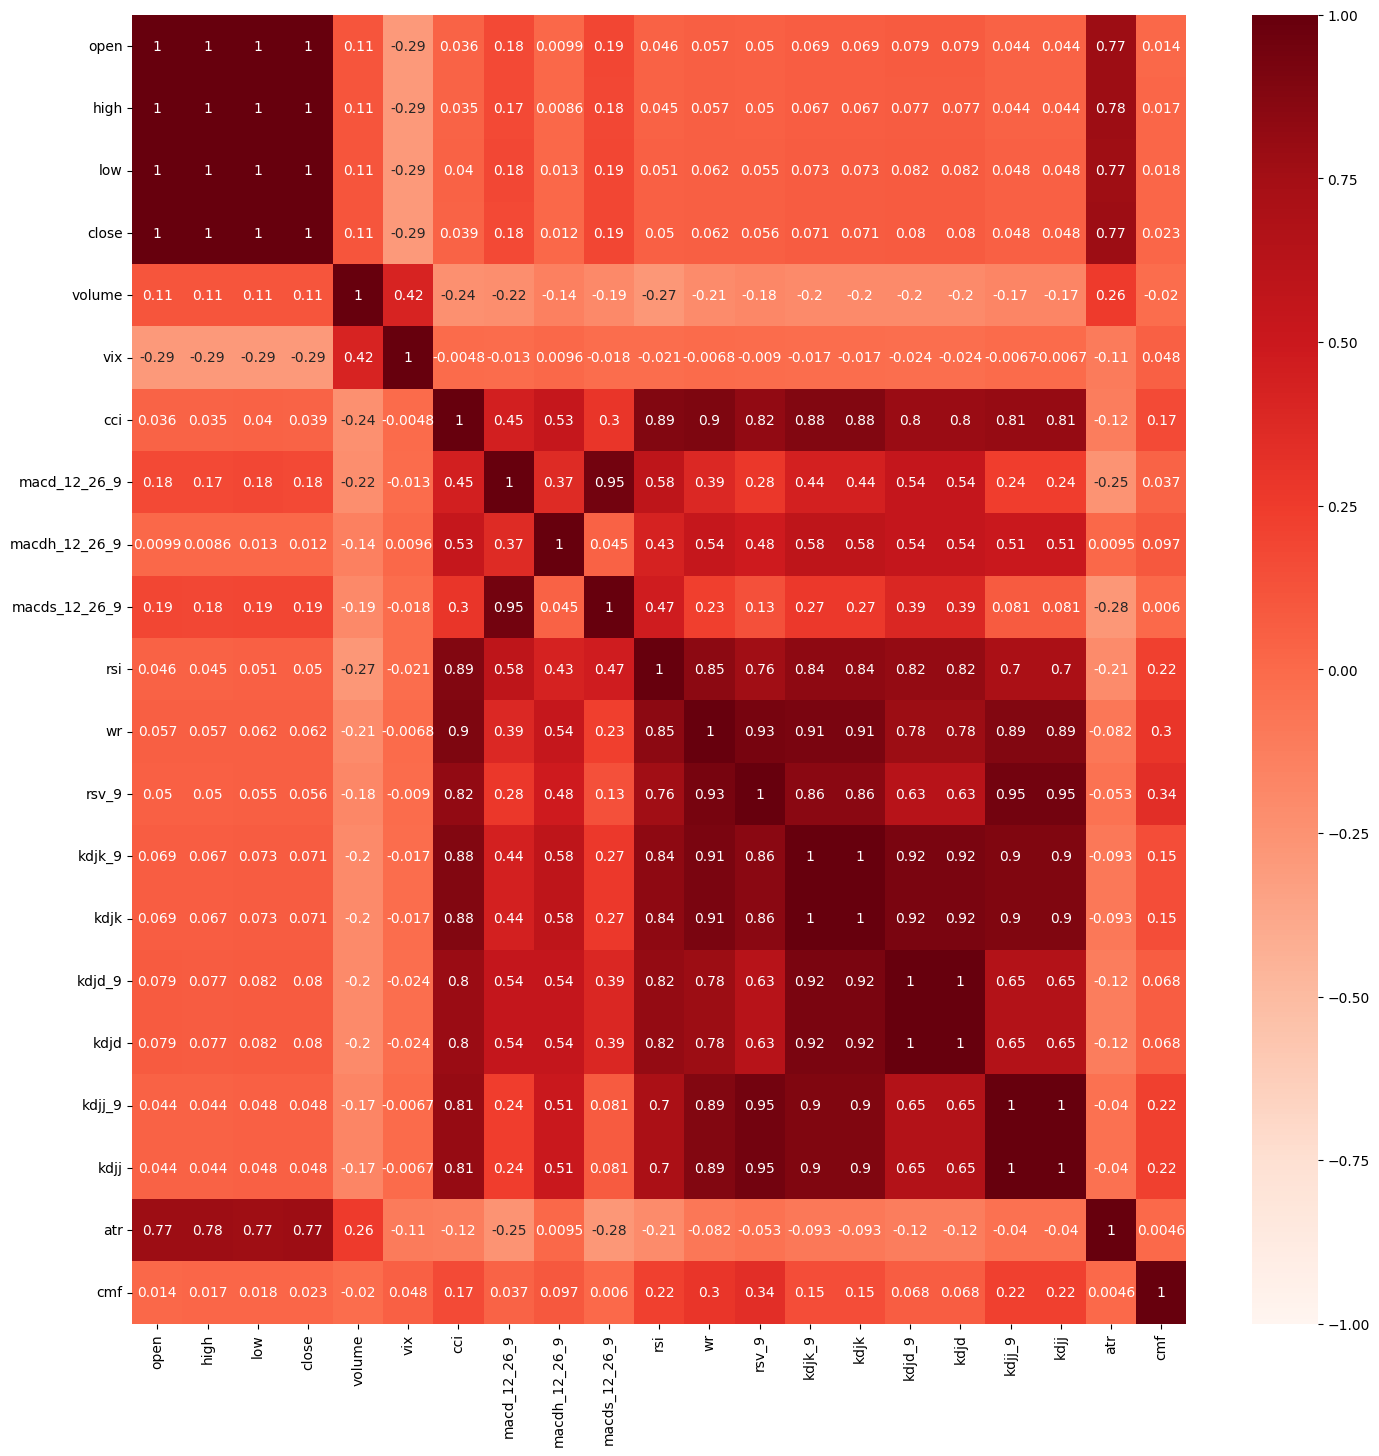

In [ ]:
# show absolute correlation between features in a heatmap
import seaborn as sns

plt.figure(figsize=(17,17))
cor = stockstats_spy.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=-1, vmax=1)
plt.show()

# **Generating target columns**
#### Our goal is to predict tomorrows, next week and next month direction.
#### To do so we will add new columns - next day, week & month closing prices.
#### We'll now add those coulmn and also add a boolean column to each one so we can say if the price went up or down during that period. 
#### A total of **6** columns.

In [ ]:
stockstats_spy["tomorrow"] = stockstats_spy["close"].shift(-1)  # Shifts Close values one day back and makes a new column from those values
stockstats_spy["next_week"] = stockstats_spy["close"].shift(-5) # Next week values are 5 days apart because there are 5 trading days a week
stockstats_spy["next_month"] = stockstats_spy["close"].shift(-20) # Same logic as above

## **Now, based on those column, we can calculate direction -> 3 more boolean (0 or 1 ) columns**

In [ ]:
stockstats_spy["target_tomrrow"] = (stockstats_spy["tomorrow"] > stockstats_spy["close"]).astype(int)
stockstats_spy["target_next_week"] = (stockstats_spy["next_week"] > stockstats_spy["close"]).astype(int)
stockstats_spy["target_next_month"] = (stockstats_spy["next_month"] > stockstats_spy["close"]).astype(int)

# **Data Cleaning**
## Handling Missing Values



Text(0.5, 1.0, 'Missing values heatmap')

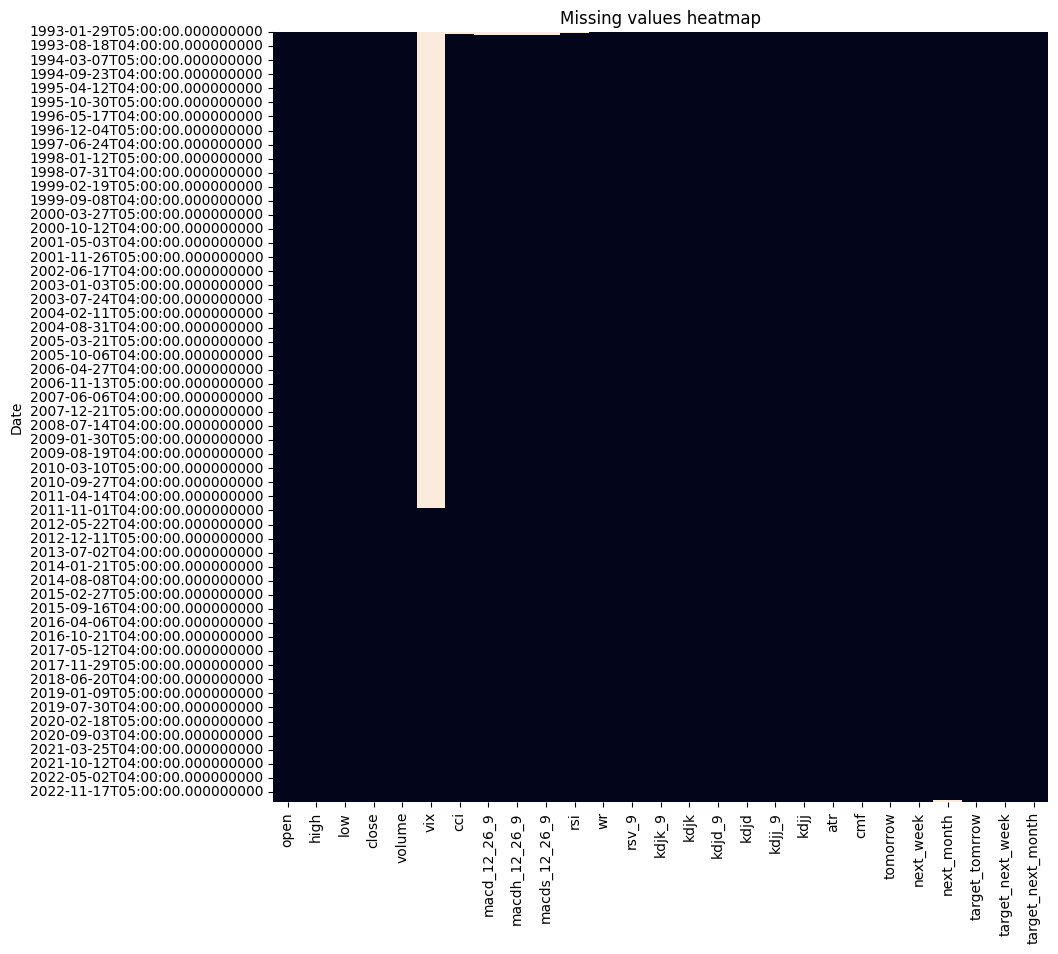

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(stockstats_spy.isna(), cbar = False).set_title("Missing values heatmap")


## **Conclusion**
### As expected, VIX has many missing values and we will need to fill those in the best way possible so we wont damage the information gain
### It is hard to see in the diagram but some of the indicators have missing values due to usage of moving average
### There also missing values in the end of the dataframe

In [ ]:
spy_no_vix = stockstats_spy.drop_column('vix')

In [ ]:
spy_no_vix.tail(21)

,open,high,low,close,volume,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,...,kdjj_9,kdjj,atr,cmf,tomorrow,next_week,next_month,target_tomrrow,target_next_week,target_next_month
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-16 00:00:00-04:00,385.349316,394.962620,384.821332,394.603973,143254200,-57.845961,-3.029242,-0.801728,-2.227514,48.613086,...,50.873254,50.873254,6.817566,1.331218e+08,389.989990,393.170013,412.459991,0,0,1
2023-03-17 00:00:00-04:00,393.220001,394.399994,388.549988,389.989990,140553400,-57.273964,-3.030372,-0.642286,-2.388085,44.363817,...,51.526026,51.526026,6.763024,-7.135783e+07,393.739990,395.750000,NaN,1,1,0
2023-03-20 00:00:00-04:00,390.799988,394.170013,390.070007,393.739990,93055800,-25.298681,-2.697577,-0.247593,-2.449984,48.317861,...,70.525333,70.525333,6.578524,7.353575e+07,398.910004,396.489990,NaN,1,1,0
2023-03-21 00:00:00-04:00,397.239990,399.410004,395.579987,398.910004,91524200,63.522683,-1.993676,0.365046,-2.358722,53.250776,...,98.295459,98.295459,6.513631,6.762765e+07,392.109985,395.600006,NaN,0,0,0
2023-03-22 00:00:00-04:00,398.730011,402.489990,392.070007,392.109985,111746600,25.519335,-1.961919,0.317443,-2.279362,46.908851,...,79.511368,79.511368,6.792656,-1.108891e+08,393.170013,401.350006,NaN,1,1,0
2023-03-23 00:00:00-04:00,395.089996,399.290009,390.350006,393.170013,119351300,7.344655,-1.830119,0.359394,-2.189513,47.949519,...,72.027175,72.027175,6.946038,-4.405567e+07,395.750000,403.700012,NaN,1,1,0
2023-03-24 00:00:00-04:00,391.839996,395.839996,389.399994,395.750000,107682400,-2.913040,-1.500189,0.551459,-2.051648,50.493070,...,72.588449,72.588449,6.909892,1.046728e+08,396.489990,409.390015,NaN,1,1,0
2023-03-27 00:00:00-04:00,398.119995,398.920013,395.559998,396.489990,74010400,56.455594,-1.165571,0.708862,-1.874433,51.229224,...,75.027162,75.027162,6.656330,-3.304087e+07,395.600006,410.950012,NaN,0,1,0
2023-03-28 00:00:00-04:00,395.769989,396.489990,393.690002,395.600006,62871700,26.189696,-0.961119,0.730651,-1.691770,50.261221,...,68.319905,68.319905,6.380877,2.290380e+07,401.350006,408.670013,NaN,1,1,0


In [ ]:
spy_no_vix.head(40)

,open,high,low,close,volume,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,...,kdjj_9,kdjj,atr,cmf,tomorrow,next_week,next_month,target_tomrrow,target_next_week,target_next_month
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.140234,25.140234,25.015158,25.122366,1003200,NaN,NaN,NaN,NaN,NaN,...,77.777778,77.777778,0.125076,7.165714e+05,25.301027,25.712000,25.318882,1,1,1
1993-02-01 00:00:00-05:00,25.140216,25.301027,25.140216,25.301027,480500,NaN,NaN,NaN,NaN,NaN,...,102.116402,102.116402,0.152861,4.805000e+05,25.354622,25.712000,25.694120,1,1,1
1993-02-02 00:00:00-05:00,25.283150,25.372490,25.229546,25.354622,201300,NaN,NaN,NaN,NaN,NaN,...,108.809227,108.809227,0.149307,1.509750e+05,25.622648,25.533314,25.801331,1,1,1
1993-02-03 00:00:00-05:00,25.390365,25.640516,25.372497,25.622648,529400,NaN,NaN,NaN,NaN,NaN,...,111.916306,111.916306,0.187338,4.588133e+05,25.729860,25.569035,25.658398,1,0,1
1993-02-04 00:00:00-05:00,25.711992,25.783464,25.426105,25.729860,531500,NaN,NaN,NaN,NaN,NaN,...,108.451549,108.451549,0.226559,3.720500e+05,25.712000,25.694120,25.586918,0,0,0
1993-02-05 00:00:00-05:00,25.712000,25.765604,25.569056,25.712000,492100,NaN,NaN,NaN,NaN,NaN,...,103.389326,103.389326,0.220587,2.236818e+05,25.712000,25.497570,26.158680,0,0,1
1993-02-08 00:00:00-05:00,25.712000,25.801340,25.676264,25.712000,596100,NaN,NaN,NaN,NaN,NaN,...,98.125401,98.125401,0.203731,-2.554714e+05,25.533314,24.854345,26.069349,0,0,1
1993-02-09 00:00:00-05:00,25.622654,25.622654,25.479710,25.533314,122100,NaN,NaN,NaN,NaN,NaN,...,77.053917,77.053917,0.208292,-3.052500e+04,25.569035,24.836445,26.122946,1,0,1
1993-02-10 00:00:00-05:00,25.533299,25.586903,25.461827,25.569035,379600,NaN,NaN,NaN,NaN,NaN,...,69.984264,69.984264,0.196080,2.711429e+05,25.694120,24.818592,26.051483,1,0,1


## According to the data above we need to remove 33 rows from the beggining & 20 rows from the end

In [ ]:
spy_clean = spy_no_vix.drop_head(33)
spy_clean = spy_clean.drop_tail(20)

In [ ]:
spy_clean.isna().sum()

open                 0
high                 0
low                  0
close                0
volume               0
cci                  0
macd_12_26_9         0
macdh_12_26_9        0
macds_12_26_9        0
rsi                  0
wr                   0
rsv_9                0
kdjk_9               0
kdjk                 0
kdjd_9               0
kdjd                 0
kdjj_9               0
kdjj                 0
atr                  0
cmf                  0
tomorrow             0
next_week            0
next_month           0
target_tomrrow       0
target_next_week     0
target_next_month    0
dtype: int64

# **Let us start with a base model - Random Forest Classifier**
### This is a classification mission and not a regression, we want direction, not a certain price.
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## **Test Train split**
We have data from 1993 untill today, about 30 years of data

Unlike regular data frame, Time series data cannot be splitted randomly across the dataframe while sampling random rows, as this can be resulted in the model 'cheating' and knowing what will happen in the future.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_day = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = spy_clean.iloc[:-400] # all days up to the last 400 days
test = spy_clean.iloc[-400:] # last 400 days
# Relevant columns for the model to look at
predictors = ['close','volume', 'cci', 'macd_12_26_9', 'macdh_12_26_9',
       'macds_12_26_9', 'rsi', 'wr', 'rsv_9', 'kdjk_9', 'kdjk', 'kdjd_9',
       'kdjd', 'kdjj_9', 'kdjj', 'atr', 'cmf', ] 
model_day.fit(train[predictors], train["target_tomrrow"])

RandomForestClassifier(min_samples_split=100, random_state=1)

## **Metrics**
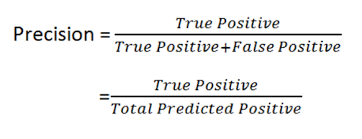

First lets have a look on precision score, afterwards we are going to measure actual profit. 

**POSITIVE = MARKET GOING UP**


In [ ]:
from sklearn.metrics import precision_score

preds = model_day.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target_tomrrow"], preds)

0.4763231197771588

## Second model with different Hyperparamters

In [ ]:
model_day_2 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target_tomrrow"])
    preds = model.predict_proba(test[predictors])[:,1]   # return model's probability
    preds[preds >=.6] = 1  # only decied '1' if the model is more than 60% "sure" the market will go up
    preds[preds <.6] = 0   # else, it will go down
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target_tomrrow"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):  # 10 years of data for training, the following year is the test data
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(spy_clean,model_day_2,predictors)

In [ ]:
precision_score(predictions["target_tomrrow"], predictions["Predictions"])

0.5545454545454546

# **We got a better score!**
## **Lets add past data to each row and see how it affects the score**
* 2,5,20,125,250,500 days close ratio mean
* 2,5,20,125,250,500 days trend - how many days in those time windows did the market actually went up

In [ ]:
horizons = [ 2,5,20,125,250,500]

for horizon in horizons:
    rolling_averages = spy_clean.rolling(horizon).mean()
    
    ratio_column = f"close_ratio_{horizon}"
    spy_clean[ratio_column] = spy_clean["close"] / rolling_averages["close"]
    
    trend_column = f"trend_{horizon}"
    spy_clean[trend_column] = spy_clean.shift(1).rolling(horizon).sum()["target_tomrrow"]
    


In [ ]:
spy_clean = spy_clean.dropna()

In [ ]:
spy_clean

,open,high,low,close,volume,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,...,close_ratio_5,trend_5,close_ratio_20,trend_20,close_ratio_125,trend_125,close_ratio_250,trend_250,close_ratio_500,trend_500
Date,,,,,,,,,,,,,,,,,,,,,
1995-03-10 00:00:00-05:00,29.242962,29.722509,29.205350,29.647285,192100,169.554971,0.202731,-0.036609,0.239340,67.542967,...,1.011096,3.0,1.012053,13.0,1.058187,74.0,1.077596,134.0,1.095370,255.0
1995-03-13 00:00:00-05:00,29.628479,29.722507,29.590867,29.619076,261300,214.842299,0.211749,-0.022073,0.233822,66.346308,...,1.008452,2.0,1.010198,12.0,1.056659,73.0,1.076235,134.0,1.094024,255.0
1995-03-14 00:00:00-05:00,29.703702,29.872954,29.703702,29.835342,223300,237.938079,0.233653,-0.000135,0.233788,70.640789,...,1.011089,3.0,1.016320,12.0,1.063792,73.0,1.083756,134.0,1.101678,256.0
1995-03-15 00:00:00-05:00,29.788324,29.835338,29.666087,29.778921,278500,176.191114,0.243651,0.007891,0.235761,68.195817,...,1.005397,2.0,1.013310,11.0,1.061324,72.0,1.081379,134.0,1.099270,255.0
1995-03-16 00:00:00-05:00,29.750729,29.976398,29.750729,29.957592,20400,187.873691,0.262961,0.021760,0.241201,71.553521,...,1.006381,3.0,1.018266,11.0,1.067117,73.0,1.087509,135.0,1.105524,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10 00:00:00-05:00,389.503452,391.665215,382.858828,384.442780,189253000,-166.098778,-2.432119,-1.637310,-0.794810,35.080390,...,0.974949,2.0,0.961463,9.0,0.993030,54.0,0.970877,115.0,0.933620,250.0
2023-03-13 00:00:00-04:00,380.358346,388.905741,379.202752,383.894836,157790000,-174.206878,-3.196125,-1.921052,-1.275073,34.668170,...,0.983051,1.0,0.962813,8.0,0.992065,53.0,0.969737,115.0,0.932291,249.0
2023-03-14 00:00:00-04:00,389.015327,391.954123,385.578432,390.240662,149752400,-105.495133,-3.252062,-1.581591,-1.670471,43.019046,...,1.002647,2.0,0.981315,8.0,1.008422,54.0,0.986041,115.0,0.947649,250.0


In [ ]:
spy_clean.columns

Index(['open', 'high', 'low', 'close', 'volume', 'cci', 'macd_12_26_9',
       'macdh_12_26_9', 'macds_12_26_9', 'rsi', 'wr', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'atr', 'cmf', 'tomorrow',
       'next_week', 'next_month', 'target_tomrrow', 'target_next_week',
       'target_next_month', 'close_ratio_2', 'trend_2', 'close_ratio_5',
       'trend_5', 'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500'],
      dtype='object')

## **Now lets try again**


In [ ]:
predictors = ['open', 'high', 'low', 'close', 'volume', 'cci', 'macd_12_26_9',
       'macdh_12_26_9', 'macds_12_26_9', 'rsi', 'wr', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'atr', 'cmf',
       'close_ratio_2', 'trend_2', 'close_ratio_5',
       'trend_5', 'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500']
predictions = backtest(spy_clean,model_day_2,predictors)
precision_score(predictions["target_tomrrow"], predictions["Predictions"])

0.5307692307692308

# **Weekly upward direction prediction**

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target_next_week"])
    preds = model.predict_proba(test[predictors])[:,1]   # return model's probability
    preds[preds >=.6] = 1  # only decied '1' if the model is more than 60% "sure" the market will go up
    preds[preds <.6] = 0   # else, it will go down
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target_next_week"], preds], axis=1)
    return combined

In [ ]:
predictors = ['open', 'high', 'low', 'close', 'volume', 'cci', 'macd_12_26_9',
       'macdh_12_26_9', 'macds_12_26_9', 'rsi',
       'close_ratio_2', 'trend_2', 'close_ratio_5',
       'trend_5', 'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500']
model_week =  RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
predictions_week = backtest(spy_clean,model_week,predictors)
precision_score(predictions_week["target_next_week"], predictions_week["Predictions"])

0.5824175824175825

# **Monthly upward direction prediction**

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target_next_month"])
    preds = model.predict_proba(test[predictors])[:,1]   # return model's probability
    preds[preds >=.65] = 1  # only decied '1' if the model is more than 60% "sure" the market will go up
    preds[preds <.65] = 0   # else, it will go down
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target_next_month"], preds], axis=1)
    return combined

In [ ]:
predictors = ['open', 'high', 'low', 'close', 'volume', 'cci', 'macd_12_26_9',
       'macdh_12_26_9', 'macds_12_26_9', 'rsi',
       'close_ratio_2', 'trend_2', 'close_ratio_5',
       'trend_5', 'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500']

In [ ]:
model_month =  RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
predictions_month = backtest(spy_clean,model_month,predictors)
precision_score(predictions_month["target_next_month"], predictions_month["Predictions"])

0.66796875

# **Testing different models**
### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
linear_model_month = LogisticRegression()
predictions_logistic = backtest(spy_clean, linear_model_month,predictors)
precision_score(predictions_logistic["target_next_month"], predictions_logistic["Predictions"])

0.5774099318403116

### SGD Classifier Model


In [ ]:
from sklearn.linear_model import SGDClassifier

SGD_model_month = SGDClassifier(loss="modified_huber") # l2 penalty as default
predictions_sgd = backtest(spy_clean, SGD_model_month,predictors)
precision_score(predictions_sgd["target_next_month"], predictions_sgd["Predictions"])

0.6377118644067796

In [ ]:
from sklearn.linear_model import SGDClassifier

SGD2_model_month = SGDClassifier(loss="modified_huber", penalty='elasticnet') # trying different penalty
predictions_sgd2 = backtest(spy_clean, SGD2_model_month,predictors)
precision_score(predictions_sgd2["target_next_month"], predictions_sgd2["Predictions"])

0.6766493055555556

# **Monthly Downward direction prediction accuracy**
<img src= "https://geekymedics.com/wp-content/uploads/2018/06/Specificity-equation.jpg" height= 250>

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
tn, fp, fn, tp = confusion_matrix(predictions_month["target_next_month"], predictions_month["Predictions"]).ravel()
specificity = tn / (tn+fp)

In [ ]:
specificity

0.7249190938511327

In [ ]:
predictions_month.tail(15)

,target_next_month,Predictions
Date,,
2023-02-24 00:00:00-05:00,1,0.0
2023-02-27 00:00:00-05:00,1,0.0
2023-02-28 00:00:00-05:00,1,0.0
2023-03-01 00:00:00-05:00,1,0.0
2023-03-02 00:00:00-05:00,1,0.0
2023-03-03 00:00:00-05:00,1,0.0
2023-03-06 00:00:00-05:00,1,0.0
2023-03-07 00:00:00-05:00,1,0.0
2023-03-08 00:00:00-05:00,1,0.0


In [ ]:
sum_of_upward_days = predictions_month.shift(1).rolling(20).sum()["Predictions"]
sum_of_upward_days

Date
2005-02-11 00:00:00-05:00    NaN
2005-02-14 00:00:00-05:00    NaN
2005-02-15 00:00:00-05:00    NaN
2005-02-16 00:00:00-05:00    NaN
2005-02-17 00:00:00-05:00    NaN
                            ... 
2023-03-10 00:00:00-05:00    0.0
2023-03-13 00:00:00-04:00    0.0
2023-03-14 00:00:00-04:00    0.0
2023-03-15 00:00:00-04:00    0.0
2023-03-16 00:00:00-04:00    0.0
Name: Predictions, Length: 4554, dtype: float64

In [ ]:
sum_of_upward_days = sum_of_upward_days.to_frame()

In [ ]:
# create a list of our conditions
conditions = [
    (sum_of_upward_days['Predictions'] >= 14),
    (sum_of_upward_days['Predictions'] <= 6),
    ((sum_of_upward_days['Predictions'] > 6) & (sum_of_upward_days['Predictions'] < 14))
    ]

# create a list of the values we want to assign for each condition
values = ['buy', 'sell', 'hold']

# create a new column and use np.select to assign values to it using our lists as arguments
sum_of_upward_days['signal'] = np.select(conditions, values)


In [ ]:
sum_of_upward_days= sum_of_upward_days.dropna()
sum_of_upward_days

,Predictions,signal
Date,,
2005-03-14 00:00:00-05:00,7.0,hold
2005-03-15 00:00:00-05:00,6.0,sell
2005-03-16 00:00:00-05:00,7.0,hold
2005-03-17 00:00:00-05:00,7.0,hold
2005-03-18 00:00:00-05:00,8.0,hold
...,...,...
2023-03-10 00:00:00-05:00,0.0,sell
2023-03-13 00:00:00-04:00,0.0,sell
2023-03-14 00:00:00-04:00,0.0,sell


In [ ]:
actions_and_returns = pd.concat([sum_of_upward_days, spy_clean['close']], axis=1)

In [ ]:
actions_and_returns = actions_and_returns.dropna()
actions_and_returns

,Predictions,signal,close
Date,,,
2005-03-14 00:00:00-05:00,7.0,hold,85.162125
2005-03-15 00:00:00-05:00,6.0,sell,84.459084
2005-03-16 00:00:00-05:00,7.0,hold,83.742065
2005-03-17 00:00:00-05:00,7.0,hold,83.910774
2005-03-18 00:00:00-05:00,8.0,hold,83.661636
...,...,...,...
2023-03-10 00:00:00-05:00,0.0,sell,384.442780
2023-03-13 00:00:00-04:00,0.0,sell,383.894836
2023-03-14 00:00:00-04:00,0.0,sell,390.240662


# **Calculate Return on the test set - the number of days is defined at the top of the notebook**
Will be done in the following manner:
Run in a for loop across all prediction and wait for a **BUY** signal

When we see one we save current price and our position

When we see the first **SELL** signal we calculate return based on the close price of that specific day and save it

After iterating on the whole set we compare the return to the return we would have got without selling at all during this period

## **The X Days return**


In [ ]:
spy_500_days = spy_clean['close'][num_of_days:].to_frame()
spy_500_days

,close
Date,
2021-03-23 00:00:00-04:00,378.036102
2021-03-24 00:00:00-04:00,376.114349
2021-03-25 00:00:00-04:00,378.230225
2021-03-26 00:00:00-04:00,384.325378
2021-03-29 00:00:00-04:00,384.131256
...,...
2023-03-10 00:00:00-05:00,384.442780
2023-03-13 00:00:00-04:00,383.894836
2023-03-14 00:00:00-04:00,390.240662


In [ ]:
entered = spy_500_days['close'].iloc[num_of_days]
entered

378.0361022949219

In [ ]:
sold = spy_500_days['close'].iloc[-1]
sold

394.6039733886719

In [ ]:
no_sell_return = (sold / entered )*100

In [ ]:
no_sell_return

104.38261610284636

# **We are left with 111.61% of our initial amount, meaning a 11.61%  return**
# **Calculate model return**

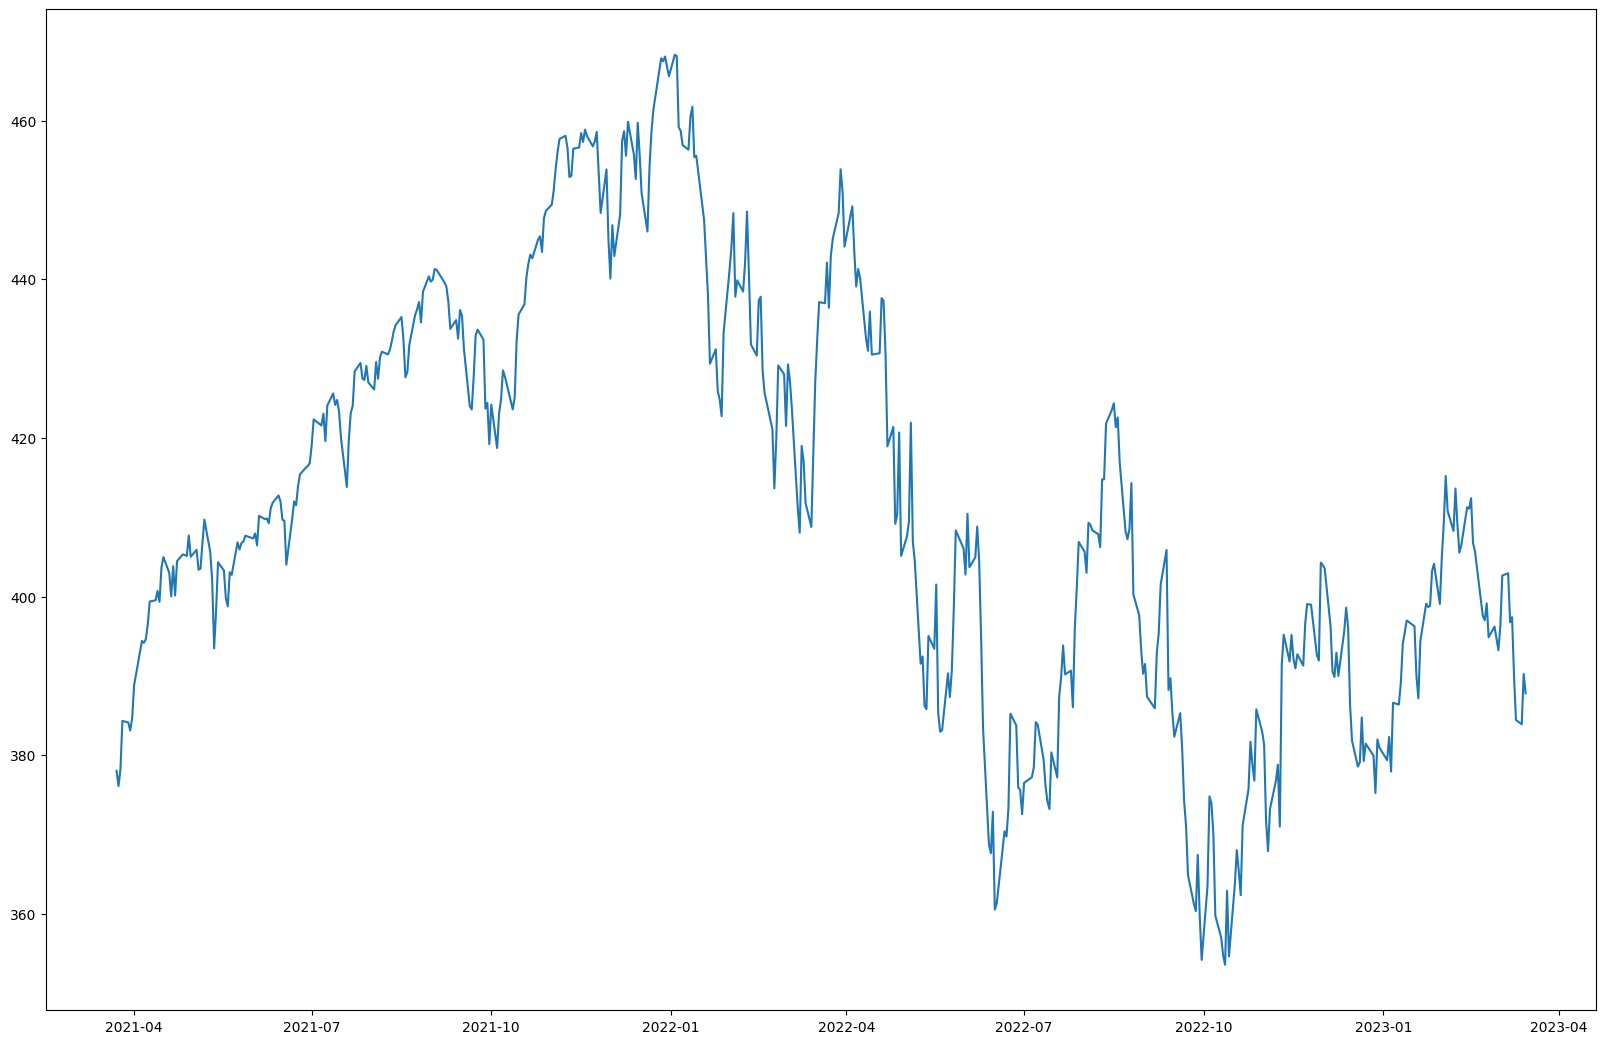

In [ ]:
plt.figure(figsize=(20,13))
plt.plot(spy_clean['close'][num_of_days:-1])

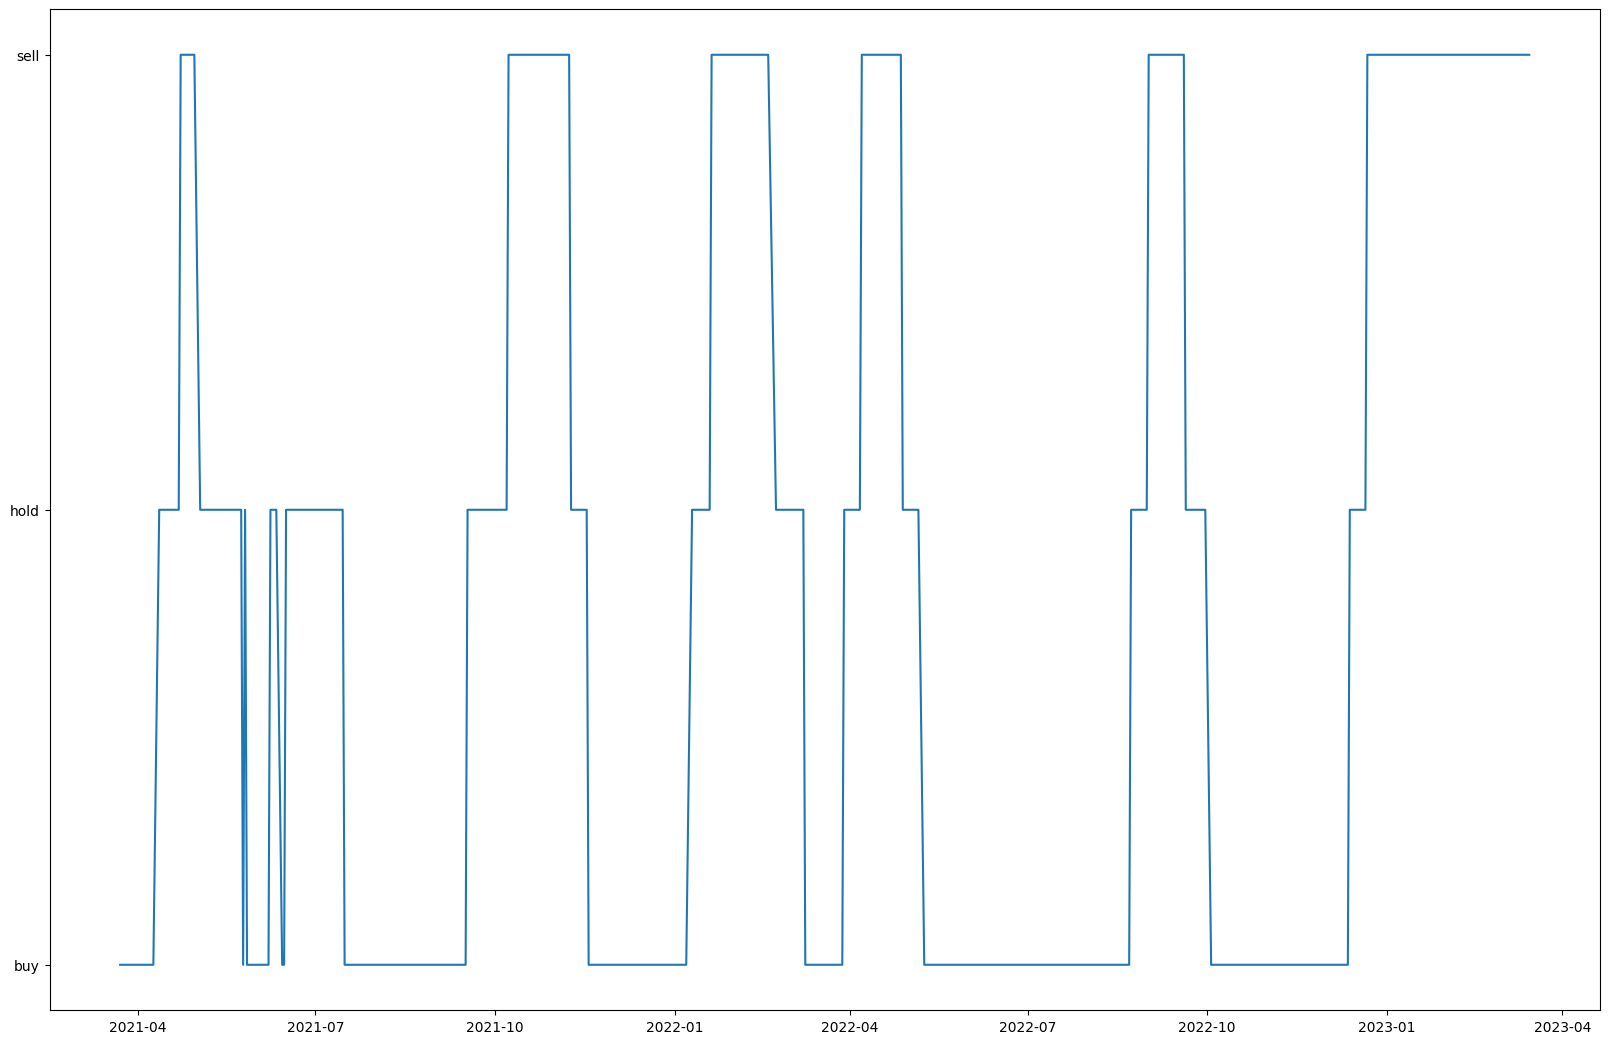

In [ ]:
plt.figure(figsize=(20,13))
plt.plot(actions_and_returns['signal'][num_of_days:-1])

## **We can clearly see that selling at the peak of the graph could have brought us higher return, let's see if our model does that**

In [ ]:
actions_and_returns =actions_and_returns[num_of_days:]
actions_and_returns

,Predictions,signal,close
Date,,,
2021-03-23 00:00:00-04:00,20.0,buy,378.036102
2021-03-24 00:00:00-04:00,20.0,buy,376.114349
2021-03-25 00:00:00-04:00,20.0,buy,378.230225
2021-03-26 00:00:00-04:00,20.0,buy,384.325378
2021-03-29 00:00:00-04:00,19.0,buy,384.131256
...,...,...,...
2023-03-10 00:00:00-05:00,0.0,sell,384.442780
2023-03-13 00:00:00-04:00,0.0,sell,383.894836
2023-03-14 00:00:00-04:00,0.0,sell,390.240662


In [ ]:
model1_predictions =  actions_and_returns

## **Function to calculate return**


In [ ]:
current_position = 'out' # can be in or out
total_return = 0.0
price_of_day_entered = 0.0

for index,day in actions_and_returns.iterrows():
  if (day['signal']== 'buy' and current_position == 'out'):
    current_position = 'in'
    price_of_day_entered = day['close']
    print(f"Entered on {index}, price: {day['close']} Total return: {total_return}")
  
  if (day['signal'] == 'sell' and current_position == 'in'):
    current_position = 'out'
    total_return = total_return + ( (day['close'] / price_of_day_entered ) * 100 ) - 100
    print(f"Sold on {index}, price: {day['close']}  Total return: {total_return} \n -------------------------------------")


#Close the position on the last day if it remains open
if (current_position == 'in'):
    current_position = 'out'
    total_return = total_return + ( ( actions_and_returns['close'].iloc[-2] / price_of_day_entered ) * 100 ) - 100
    print(f"Sold on {actions_and_returns.iloc[-1]}, price: {actions_and_returns['close'].iloc[-1]}  Total return: {total_return}")
print(f"Total return: {total_return}")


Entered on 2021-03-23 00:00:00-04:00, price: 378.0361022949219 Total return: 0.0
Sold on 2021-04-23 00:00:00-04:00, price: 404.47430419921875  Total return: 6.993565361562034 
 -------------------------------------
Entered on 2021-05-25 00:00:00-04:00, price: 405.93017578125 Total return: 6.993565361562034
Sold on 2021-10-08 00:00:00-04:00, price: 427.72894287109375  Total return: 12.363643367684645 
 -------------------------------------
Entered on 2021-11-18 00:00:00-05:00, price: 458.861572265625 Total return: 12.363643367684645
Sold on 2022-01-20 00:00:00-05:00, price: 437.9465026855469  Total return: 7.805608691385615 
 -------------------------------------
Entered on 2022-03-09 00:00:00-05:00, price: 418.9876403808594 Total return: 7.805608691385615
Sold on 2022-04-07 00:00:00-04:00, price: 441.2933654785156  Total return: 13.129327805720436 
 -------------------------------------
Entered on 2022-05-09 00:00:00-04:00, price: 391.536376953125 Total return: 13.129327805720436
Sold 

## **Conclusion** 
### This data may be different than the code above due to running the code on different days that result in different data, yet the model's result remain better than the no-actions result
We got a **24.38%** return on our investment

The Model did a total of **12** Buy/Sell Actions (Swing trading, yet we can see in the stock graph above it was necessary to maximize the return)

The Model outpreformed the no-actions return from 2020-12-18 to 2022-12-13 , more than double that return!

**24.38 / 11.61 = ~ 2.1**



# **Fundamental Data Model**
### Because fundamental data does not change every day due to the fact that financial reports are released qurarterly or annualy we will combine the information from the report with the data of the stock, which is new every day.

In [ ]:
spy_clean

,open,high,low,close,volume,cci,macd_12_26_9,macdh_12_26_9,macds_12_26_9,rsi,...,close_ratio_5,trend_5,close_ratio_20,trend_20,close_ratio_125,trend_125,close_ratio_250,trend_250,close_ratio_500,trend_500
Date,,,,,,,,,,,,,,,,,,,,,
1995-03-10 00:00:00-05:00,29.242962,29.722509,29.205350,29.647285,192100,169.554971,0.202731,-0.036609,0.239340,67.542967,...,1.011096,3.0,1.012053,13.0,1.058187,74.0,1.077596,134.0,1.095370,255.0
1995-03-13 00:00:00-05:00,29.628479,29.722507,29.590867,29.619076,261300,214.842299,0.211749,-0.022073,0.233822,66.346308,...,1.008452,2.0,1.010198,12.0,1.056659,73.0,1.076235,134.0,1.094024,255.0
1995-03-14 00:00:00-05:00,29.703702,29.872954,29.703702,29.835342,223300,237.938079,0.233653,-0.000135,0.233788,70.640789,...,1.011089,3.0,1.016320,12.0,1.063792,73.0,1.083756,134.0,1.101678,256.0
1995-03-15 00:00:00-05:00,29.788324,29.835338,29.666087,29.778921,278500,176.191114,0.243651,0.007891,0.235761,68.195817,...,1.005397,2.0,1.013310,11.0,1.061324,72.0,1.081379,134.0,1.099270,255.0
1995-03-16 00:00:00-05:00,29.750729,29.976398,29.750729,29.957592,20400,187.873691,0.262961,0.021760,0.241201,71.553521,...,1.006381,3.0,1.018266,11.0,1.067117,73.0,1.087509,135.0,1.105524,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10 00:00:00-05:00,389.503452,391.665215,382.858828,384.442780,189253000,-166.098778,-2.432119,-1.637310,-0.794810,35.080390,...,0.974949,2.0,0.961463,9.0,0.993030,54.0,0.970877,115.0,0.933620,250.0
2023-03-13 00:00:00-04:00,380.358346,388.905741,379.202752,383.894836,157790000,-174.206878,-3.196125,-1.921052,-1.275073,34.668170,...,0.983051,1.0,0.962813,8.0,0.992065,53.0,0.969737,115.0,0.932291,249.0
2023-03-14 00:00:00-04:00,389.015327,391.954123,385.578432,390.240662,149752400,-105.495133,-3.252062,-1.581591,-1.670471,43.019046,...,1.002647,2.0,0.981315,8.0,1.008422,54.0,0.986041,115.0,0.947649,250.0


 ### Getting the Fundamental Data
Selecting the right set of companies and the most relevant financial metrics is crucial for building a robust machine learning model to predict the S&P 500 stock price.
##### The S&P 500 is a market capitalization-weighted index that includes 500 of the largest publicly traded companies in the US. Here are some factors we might want to consider when selecting companies to include in our model:
##### **Sector diversity**: You want to ensure that your selection of companies represents a broad range of sectors to capture a full picture of the economy.
**Market cap**: we will consider selecting companies with the highest market capitalization, as they typically have a greater impact on the index's overall performance.
**Financial stability**: we might want to consider companies with a history of financial stability and consistent earnings growth to minimize volatility in the data.
Based on these factors, here are some potential companies to consider:

* Apple Inc. (AAPL)
* Amazon.com Inc. (AMZN)
* Alphabet Inc. (GOOGL)
* Pfizer Inc. (PFE)
* Berkshire Hathaway (BRK-B)
* JPMorgan Chase & Co. (JPM)
* Microsoft Corporation (MSFT)
* Procter & Gamble Co. (PG)
* Walmart (WMT)
##### **Financial Metrics**:
Financial metrics we might consider including in our model:
* Revenue
* Earnings per share (EPS)
* Price-to-earnings ratio (P/E)
* Price-to-sales ratio (P/S)
* Price-to-book ratio (P/B)
* Dividend yield


In [ ]:
pip install fundamentalanalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import fundamentalanalysis as fa

ticker = "MSFT"
api_key = "e13623957856263d072bda58bdf1ac92"

# Show the available companies
companies = fa.available_companies(api_key)

# Collect general company information
profile = fa.profile(ticker, api_key)

# Collect recent company quotes
quotes = fa.quote(ticker, api_key)

# Show recommendations of Analysts
ratings = fa.rating(ticker, api_key)

# Collect the Balance Sheet statements
balance_sheet_annually = fa.balance_sheet_statement(ticker, api_key, period="annual")

# Collect the Income Statements
income_statement_annually = fa.income_statement(ticker, api_key, period="annual")

# Collect the Cash Flow Statements
cash_flow_statement_annually = fa.cash_flow_statement(ticker, api_key, period="annual")

# Show Key Metrics
key_metrics_annually = fa.key_metrics(ticker, api_key, period="annual")

# Show a large set of in-depth ratios
financial_ratios_annually = fa.financial_ratios(ticker, api_key, period="annual")

# Show the growth of the company
growth_annually = fa.financial_statement_growth(ticker, api_key, period="annual")

# Download general stock data
stock_data = fa.stock_data(ticker, period="ytd", interval="1d")

# Download detailed stock data
stock_data_detailed = fa.stock_data_detailed(ticker, api_key, begin="2000-01-01", end="2020-01-01")


# The data below is what we need, we will define a function to get it for desired ticker (company) and extract only the relevant data

In [ ]:
financial_ratios_annually

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986
period,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY,...,FY,FY,FY,FY,FY,FY,FY,FY,FY,FY
currentRatio,1.784607,2.079994,2.515765,2.528839,2.9008,2.477273,2.352882,2.501344,2.504022,2.711762,...,4.172235,4.722892,5.062167,3.959946,3.505453,3.853854,2.952771,2.936224,4.570815,5.016949
quickRatio,1.567174,1.899196,2.33077,2.352967,2.739861,2.367583,2.215695,2.295198,2.306915,2.525804,...,1.887899,2.138007,2.399645,3.614008,2.251193,2.287473,1.911839,2.353741,4.025751,4.650847
cashRatio,0.146516,0.160439,0.187747,0.163584,0.204247,0.118756,0.109675,0.112219,0.190005,0.101665,...,1.45657,1.617744,1.79929,1.770866,1.42195,1.318522,1.211587,1.557823,2.843348,3.481356
daysOfSalesOutstanding,81.481137,82.609675,81.697829,85.632574,87.58214,80.312173,78.189229,69.848472,82.152638,81.984226,...,35.719218,37.292966,32.872369,108.982673,48.174297,55.826432,50.514001,57.826676,58.142527,63.759494
daysOfInventoryOutstanding,21.800958,18.420509,15.01096,17.548241,25.333872,23.235311,25.064521,32.06096,36.047375,34.933577,...,52.828947,70.779468,96.172199,88.544197,59.942469,98.323643,76.65,147.935606,91.387632,83.190883
operatingCycle,103.282095,101.030183,96.708789,103.180814,112.916012,103.547485,103.25375,101.909432,118.200013,116.917803,...,88.548166,108.072434,129.044568,197.52687,108.116766,154.150076,127.164001,205.762282,149.530159,146.950377
daysOfPayablesOutstanding,110.694334,105.959852,99.254525,79.804941,82.006753,78.729459,76.808115,72.816605,100.715824,87.027508,...,337.985197,224.828897,180.985477,193.271675,109.321827,90.188953,85.166667,0,0,0
cashConversionCycle,-7.412239,-4.929669,-2.545736,23.375874,30.909259,24.818026,26.445635,29.092827,17.484189,29.890295,...,-249.437032,-116.756463,-51.940909,4.255195,-1.205061,63.961122,41.997335,205.762282,149.530159,146.950377
grossProfitMargin,0.684017,0.689258,0.67781,0.65902,0.652474,0.619111,0.615799,0.646954,0.689818,0.739894,...,0.897591,0.886857,0.871569,0.871642,0.844418,0.825587,0.77598,0.776574,0.808326,0.822278


In [ ]:
# Earnings per share (EPS)
# Price-to-earnings ratio (P/E)
# Price-to-sales ratio (P/S)
# Price-to-book ratio (P/B)
# Dividend yield

def get_company_metrics(all_metrics, ticker):
  data = pd.DataFrame(all_metrics['priceEarningsRatio'])
  data = data.rename(columns = {"priceEarningsRatio": ticker + " P/E ratio"})
  data = pd.concat([data,all_metrics['priceToSalesRatio']] , axis=1)
  data = data.rename(columns = {"priceToSalesRatio": ticker + " P/S ratio"})
  data = pd.concat([data,all_metrics['priceToBookRatio']] , axis=1)
  data = data.rename(columns = {"priceToBookRatio": ticker + " P/B ratio"})
 
  return data


In [ ]:
msft_data = get_company_metrics(financial_ratios_annually.transpose(),'MSFT')

In [ ]:
msft_data

,MSFT P/E ratio,MSFT P/S ratio,MSFT P/B ratio
2022,26.467564,9.70998,11.559833
2021,33.367862,12.163166,14.398979
2020,34.974619,10.829012,13.090945
2019,26.530903,8.272789,10.17368
2018,45.820832,6.880183,9.179344
2017,25.18071,5.935873,7.37536
2016,24.141103,4.752957,5.632488
2015,29.608345,3.857817,4.508005
2014,15.677643,3.985447,3.854454
2013,13.162192,3.696451,3.645179


## Let's do the same for the rest of the tickers

In [ ]:
tickers = ['AAPL', 'TGT', 'GOOGL', 'PFE', 'BRK-B', 'JPM', 'PG']

In [ ]:
companies_data = msft_data

for ticker in tickers:
  financial_ratios_annually = fa.financial_ratios(ticker, api_key, period="annual")
  current_company = get_company_metrics(financial_ratios_annually.transpose(),ticker)
  companies_data = pd.concat([companies_data,current_company] , axis=1)


In [ ]:
companies_data

,MSFT P/E ratio,MSFT P/S ratio,MSFT P/B ratio,AAPL P/E ratio,AAPL P/S ratio,AAPL P/B ratio,TGT P/E ratio,TGT P/S ratio,TGT P/B ratio,GOOGL P/E ratio,...,PFE P/B ratio,BRK-B P/E ratio,BRK-B P/S ratio,BRK-B P/B ratio,JPM P/E ratio,JPM P/S ratio,JPM P/B ratio,PG P/E ratio,PG P/S ratio,PG P/B ratio
2022,26.467564,9.70998,11.559833,24.441824,6.186138,48.14034,15.295814,1.002261,8.282898,19.21811,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2021,33.367862,12.163166,14.398979,25.916254,6.707591,38.892865,20.76321,0.969354,6.280727,25.439058,...,4.284129,7.542908,1.909889,1.338042,9.898923,3.93191,1.626694,23.256703,4.370982,7.131444
2020,34.974619,10.829012,13.090945,33.935934,7.097229,29.81827,17.243848,0.724307,4.781295,29.63135,...,3.233492,13.04212,1.937301,1.251374,13.44549,3.278348,1.402094,22.828168,4.191438,6.343755
2019,26.530903,8.272789,10.17368,18.287144,3.883841,11.166944,12.809146,0.499236,3.330129,27.011495,...,3.455544,6.81839,1.696497,1.306838,12.326785,3.883843,1.718429,70.983517,4.086974,5.886969
2018,45.820832,6.880183,9.179344,18.79066,4.211777,10.440113,13.712406,0.549522,3.412584,23.630927,...,4.042342,125.203886,2.23374,1.443764,10.209908,3.040994,1.292543,20.249965,2.954231,3.775594
2017,25.18071,5.935873,7.37536,16.630087,3.507688,5.998503,13.457615,0.523589,3.359182,57.657339,...,3.032386,10.881022,2.01949,1.403959,15.539794,3.837259,1.485407,15.025862,3.539709,4.173064
2016,24.141103,4.752957,5.632488,13.496533,2.859483,4.80796,13.517108,0.616088,3.508376,27.98198,...,3.321421,16.692944,1.797222,1.420016,12.624444,3.263791,1.228374,22.281579,3.585581,4.083201
2015,29.608345,3.857817,4.508005,12.36047,2.823845,5.529512,-28.55762,0.64337,3.337877,32.590543,...,3.080366,13.513626,1.54372,1.273522,10.016612,2.631717,0.988904,31.296,2.886753,3.52775
2014,15.677643,3.985447,3.854454,15.518132,3.354147,5.49653,18.250667,0.49551,2.216257,24.833254,...,2.772442,18.626569,1.901379,1.541188,10.822527,2.500078,1.014887,18.756563,2.629153,3.155181
2013,13.162192,3.696451,3.645179,12.061028,2.613681,3.615604,13.390198,0.54784,2.425245,14.480602,...,2.734771,15.008214,1.604721,1.317319,12.341391,2.289659,1.047433,19.311881,2.595507,3.209567


In [ ]:
companies_data.loc['2023'] = companies_data.loc['2022']
companies_data.sort_index()

,MSFT P/E ratio,MSFT P/S ratio,MSFT P/B ratio,AAPL P/E ratio,AAPL P/S ratio,AAPL P/B ratio,TGT P/E ratio,TGT P/S ratio,TGT P/B ratio,GOOGL P/E ratio,...,PFE P/B ratio,BRK-B P/E ratio,BRK-B P/S ratio,BRK-B P/B ratio,JPM P/E ratio,JPM P/S ratio,JPM P/B ratio,PG P/E ratio,PG P/S ratio,PG P/B ratio
1985,NaN,NaN,NaN,15.750112,0.50248,1.750966,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,5.611813,0,0,NaN,NaN,NaN
1986,19.947974,3.969394,5.62782,13.958373,1.130233,3.096945,15.166668,0.489147,0,NaN,...,0,NaN,NaN,NaN,5.198568,0,0,18.76414,0.861699,0
1987,35.4167,7.361841,10.650191,34.036125,2.781879,8.849799,14.945652,0.415,0,NaN,...,0,NaN,NaN,NaN,-2.216338,0,0,49.324669,0.948775,0
1988,23.2639,4.878804,7.676158,14.042218,1.380631,5.602053,14.322915,0.306384,0,NaN,...,0,99.933906,16.188733,0,4.022189,0,0,12.916667,0.681372,0
1989,14.72224,3.12401,4.468035,12.570608,1.080064,3.841325,12.643679,0.29734,0,NaN,...,0,89.228441,16.075417,0,-7.132296,1.005347,0.928257,15.019269,0.846492,0
1990,30.158743,7.115363,9.166472,8.06877,0.689382,2.648506,11.041667,0.3318,0,NaN,...,0,101.162744,25.231465,7.409489,3.320901,0.275779,0.247516,18.709933,1.244687,0
1991,27.035982,6.786128,9.260845,19.186034,0.94215,3.364371,12.129629,0.337414,0,NaN,...,0,90.624959,16.422624,5.317512,22.997834,0.508933,0.486426,15.44767,1.013421,0
1992,27.34375,7.018563,8.829051,10.397471,0.778215,2.521175,16.445706,0.307177,0,NaN,...,0,97.961896,13.17132,4.420648,8.508553,1.212,0.938005,16.675638,1.06317,0
1993,27.5,6.98308,8.083745,31.587784,0.342924,1.349932,15.674602,0.334879,0,NaN,...,0,59.576197,15.651489,3.863495,6.283915,1.163903,0.902848,-54.62306,1.17743,0
1994,27.47928,6.77377,7.076686,12.895441,0.435302,1.678295,13.045636,0.25436,0,NaN,...,5.252629,74.115058,9.531418,3.037231,6.911621,1.081325,0.834918,16.490485,1.203474,4.128223


### Data Cleaning
##### First, attach the fundamental data to the stock data
##### The reports are annual so we will have the same data for every year of training

#### To merge these two dataframes based on the year of each row, we need to create a new column in the dataframe below that stands for Year, and then we can merge based on that column that exists on both data frames

In [ ]:
spy_data.tail(20)

,Open,High,Low,Close,Volume,vix,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI
Date,,,,,,,,,,,
2023-03-17 00:00:00-04:00,393.220001,394.399994,388.549988,389.989990,140553400,6.42,-57.273964,-3.030372,-0.642286,-2.388085,44.363817
2023-03-20 00:00:00-04:00,390.799988,394.170013,390.070007,393.739990,93055800,6.02,-25.298681,-2.697577,-0.247593,-2.449984,48.317861
2023-03-21 00:00:00-04:00,397.239990,399.410004,395.579987,398.910004,91524200,5.26,63.522683,-1.993676,0.365046,-2.358722,53.250776
2023-03-22 00:00:00-04:00,398.730011,402.489990,392.070007,392.109985,111746600,5.47,25.519335,-1.961919,0.317443,-2.279362,46.908851
2023-03-23 00:00:00-04:00,395.089996,399.290009,390.350006,393.170013,119351300,5.74,7.344655,-1.830119,0.359394,-2.189513,47.949519
2023-03-24 00:00:00-04:00,391.839996,395.839996,389.399994,395.750000,107682400,5.42,-2.913040,-1.500189,0.551459,-2.051648,50.493070
2023-03-27 00:00:00-04:00,398.119995,398.920013,395.559998,396.489990,74010400,5.09,56.455594,-1.165571,0.708862,-1.874433,51.229224
2023-03-28 00:00:00-04:00,395.769989,396.489990,393.690002,395.600006,62871700,4.92,26.189696,-0.961119,0.730651,-1.691770,50.261221
2023-03-29 00:00:00-04:00,399.929993,401.600006,398.679993,401.350006,77497900,4.65,106.454689,-0.331293,1.088381,-1.419675,56.040596


### Making sure both column are the same type

In [ ]:
companies_data.index = companies_data.index.astype(np.int64)

In [ ]:
spy_data["Year"] = spy_data.index.year.astype(np.int64)

### Making sure the names are equal

In [ ]:
companies_data.index.name = 'Year'


## **Ready to merge**
<img src="https://i.ytimg.com/vi/sJC5VSEbFyY/maxresdefault.jpg" width=300>

In [ ]:
merged_data = pd.merge(spy_data, companies_data, on='Year', how='left')
merged_data

,Open,High,Low,Close,Volume,vix,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,PFE P/B ratio,BRK-B P/E ratio,BRK-B P/S ratio,BRK-B P/B ratio,JPM P/E ratio,JPM P/S ratio,JPM P/B ratio,PG P/E ratio,PG P/S ratio,PG P/B ratio
0,25.140234,25.140234,25.015158,25.122366,1003200,NaN,NaN,NaN,NaN,NaN,...,0,59.576197,15.651489,3.863495,6.283915,1.163903,0.902848,-54.62306,1.17743,0
1,25.140216,25.301027,25.140216,25.301027,480500,NaN,NaN,NaN,NaN,NaN,...,0,59.576197,15.651489,3.863495,6.283915,1.163903,0.902848,-54.62306,1.17743,0
2,25.283150,25.372490,25.229546,25.354622,201300,NaN,NaN,NaN,NaN,NaN,...,0,59.576197,15.651489,3.863495,6.283915,1.163903,0.902848,-54.62306,1.17743,0
3,25.390365,25.640516,25.372497,25.622648,529400,NaN,NaN,NaN,NaN,NaN,...,0,59.576197,15.651489,3.863495,6.283915,1.163903,0.902848,-54.62306,1.17743,0
4,25.711992,25.783464,25.426105,25.729860,531500,NaN,NaN,NaN,NaN,NaN,...,0,59.576197,15.651489,3.863495,6.283915,1.163903,0.902848,-54.62306,1.17743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229,3.497679,1.627821,1.869859,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
7603,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640,3.647172,1.421851,2.225321,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
7604,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991,3.589512,1.091353,2.498159,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
7605,409.179993,413.839996,407.989990,413.470001,85814800,4.08,98.119991,3.935797,1.150110,2.785687,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031


In [ ]:
merged_data['Date'] = spy_data.index

In [ ]:
merged_data = merged_data.set_index("Date")

In [ ]:
merged_data.tail(10)

,Open,High,Low,Close,Volume,vix,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,PFE P/B ratio,BRK-B P/E ratio,BRK-B P/S ratio,BRK-B P/B ratio,JPM P/E ratio,JPM P/S ratio,JPM P/B ratio,PG P/E ratio,PG P/S ratio,PG P/B ratio
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-31 00:00:00-04:00,404.660004,409.700012,404.549988,409.390015,111974600,4.65,181.595888,1.339717,1.923821,-0.584104,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-03 00:00:00-04:00,408.850006,411.369995,408.440002,410.950012,67391100,4.46,196.894396,2.221649,2.244603,-0.022954,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-04 00:00:00-04:00,411.619995,411.920013,407.239990,408.670013,66601500,4.58,158.295764,2.705423,2.182702,0.522722,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-05 00:00:00-04:00,407.910004,408.700012,405.880005,407.600006,65200200,4.52,117.078508,2.968261,1.956431,1.011830,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-06 00:00:00-04:00,406.769989,409.480011,405.679993,409.190002,63743300,4.40,108.040959,3.267199,1.804296,1.462903,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229,3.497679,1.627821,1.869859,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640,3.647172,1.421851,2.225321,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991,3.589512,1.091353,2.498159,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-13 00:00:00-04:00,409.179993,413.839996,407.989990,413.470001,85814800,4.08,98.119991,3.935797,1.150110,2.785687,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031


### As we can see, we have missing data where the rows are of the year 2023, due to missing fundamental data after 2022 because the reports are annual.
### We need to remove those rows

In [ ]:
#merged_data = merged_data.drop(merged_data[merged_data['Year'] == 2023].index)


In [ ]:
merged_data.tail(10)

,Open,High,Low,Close,Volume,vix,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,PFE P/B ratio,BRK-B P/E ratio,BRK-B P/S ratio,BRK-B P/B ratio,JPM P/E ratio,JPM P/S ratio,JPM P/B ratio,PG P/E ratio,PG P/S ratio,PG P/B ratio
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-31 00:00:00-04:00,404.660004,409.700012,404.549988,409.390015,111974600,4.65,181.595888,1.339717,1.923821,-0.584104,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-03 00:00:00-04:00,408.850006,411.369995,408.440002,410.950012,67391100,4.46,196.894396,2.221649,2.244603,-0.022954,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-04 00:00:00-04:00,411.619995,411.920013,407.239990,408.670013,66601500,4.58,158.295764,2.705423,2.182702,0.522722,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-05 00:00:00-04:00,407.910004,408.700012,405.880005,407.600006,65200200,4.52,117.078508,2.968261,1.956431,1.011830,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-06 00:00:00-04:00,406.769989,409.480011,405.679993,409.190002,63743300,4.40,108.040959,3.267199,1.804296,1.462903,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229,3.497679,1.627821,1.869859,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640,3.647172,1.421851,2.225321,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991,3.589512,1.091353,2.498159,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031
2023-04-13 00:00:00-04:00,409.179993,413.839996,407.989990,413.470001,85814800,4.08,98.119991,3.935797,1.150110,2.785687,...,3.003877,-30.664864,2.987922,1.481373,10.556157,3.090359,1.360487,23.509499,4.32211,7.439031


## Change the index back to date

### Handling missing values

Text(0.5, 1.0, 'Missing values heatmap')

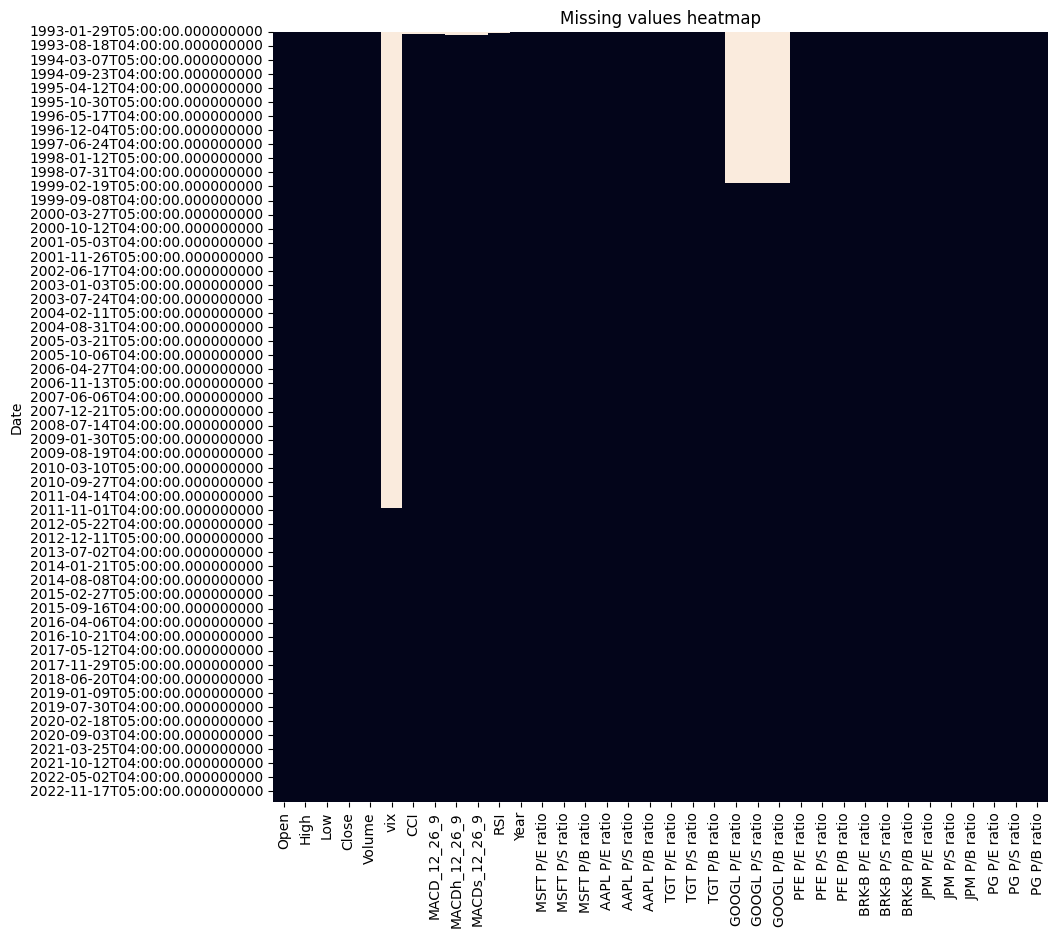

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(merged_data.isna(), cbar = False).set_title("Missing values heatmap")


## According to the graph, VIX will be removed and we will fill the rest of the missing values with zeros.
Choosing to fill median or average will give incorrect data.

In [ ]:
merged_data =merged_data.drop("vix", axis=1)

In [ ]:
merged_data=merged_data.fillna(0)

In [ ]:
merged_data.isna().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
CCI                0
MACD_12_26_9       0
MACDh_12_26_9      0
MACDs_12_26_9      0
RSI                0
Year               0
MSFT P/E ratio     0
MSFT P/S ratio     0
MSFT P/B ratio     0
AAPL P/E ratio     0
AAPL P/S ratio     0
AAPL P/B ratio     0
TGT P/E ratio      0
TGT P/S ratio      0
TGT P/B ratio      0
GOOGL P/E ratio    0
GOOGL P/S ratio    0
GOOGL P/B ratio    0
PFE P/E ratio      0
PFE P/S ratio      0
PFE P/B ratio      0
BRK-B P/E ratio    0
BRK-B P/S ratio    0
BRK-B P/B ratio    0
JPM P/E ratio      0
JPM P/S ratio      0
JPM P/B ratio      0
PG P/E ratio       0
PG P/S ratio       0
PG P/B ratio       0
dtype: int64

### **Adding horizons for each row**

In [ ]:
horizons = [ 2,5,20,125,250,500]

for horizon in horizons:
    rolling_averages = merged_data.rolling(horizon).mean()
    
    ratio_column = f"close_ratio_{horizon}"
    merged_data[ratio_column] = merged_data["Close"] / rolling_averages["Close"]
    
    trend_column = f"trend_{horizon}"
    merged_data[trend_column] = spy_clean.shift(1).rolling(horizon).sum()["target_tomrrow"]
    


# **Generating target columns**
#### Our goal is to predict next month direction.
#### We'll now add this column and also add a boolean column to each one so we can say if the price went up or down during that period. 


In [ ]:
merged_data["next_month"] = merged_data["Close"].shift(-20) # Last 20 days are a month of trading days

## **Now, based on those column, we can calculate direction -> 3 more boolean (0 or 1 ) columns**

In [ ]:
merged_data["target_next_month"] = (merged_data["next_month"] > merged_data["Close"]).astype(int)

In [ ]:
merged_data = merged_data.dropna()

In [ ]:
merged_data

,Open,High,Low,Close,Volume,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI,...,close_ratio_20,trend_20,close_ratio_125,trend_125,close_ratio_250,trend_250,close_ratio_500,trend_500,next_month,target_next_month
Date,,,,,,,,,,,,,,,,,,,,,
1997-03-03 00:00:00-05:00,49.447619,50.075526,49.408375,50.036282,1210400,-33.821037,0.434136,-0.179361,0.613497,52.237968,...,0.996619,12.0,1.082476,75.0,1.151628,136.0,1.276490,275.0,47.814999,0
1997-03-04 00:00:00-05:00,50.173633,50.310988,49.663460,49.761570,1478700,-30.462658,0.360817,-0.202145,0.562961,49.594942,...,0.990770,11.0,1.074886,74.0,1.144319,135.0,1.268178,275.0,46.958172,0
1997-03-05 00:00:00-05:00,50.055887,50.605305,49.889099,50.605305,1254800,14.641149,0.366567,-0.157115,0.523682,56.820998,...,1.006645,11.0,1.091190,75.0,1.162490,136.0,1.288317,275.0,47.214230,0
1997-03-06 00:00:00-05:00,50.624939,50.801537,50.154009,50.310986,1528500,14.654156,0.343416,-0.144213,0.487629,53.917293,...,0.999240,11.0,1.083102,74.0,1.154587,135.0,1.279487,275.0,47.805141,0
1997-03-07 00:00:00-05:00,50.507215,50.958523,50.389483,50.762302,1859300,44.426836,0.357367,-0.104209,0.461577,57.503570,...,1.006517,11.0,1.091073,74.0,1.163713,136.0,1.289600,275.0,47.992271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10 00:00:00-05:00,389.503452,391.665215,382.858828,384.442780,189253000,-166.098778,-2.432119,-1.637310,-0.794810,35.080390,...,0.961463,9.0,0.993030,54.0,0.970877,115.0,0.933620,250.0,409.609985,1
2023-03-13 00:00:00-04:00,380.358346,388.905741,379.202752,383.894836,157790000,-174.206878,-3.196125,-1.921052,-1.275073,34.668170,...,0.962813,8.0,0.992065,53.0,0.969737,115.0,0.932291,249.0,409.720001,1
2023-03-14 00:00:00-04:00,389.015327,391.954123,385.578432,390.240662,149752400,-105.495133,-3.252062,-1.581591,-1.670471,43.019046,...,0.981315,8.0,1.008422,54.0,0.986041,115.0,0.947649,250.0,408.049988,1


## **Test Train split**
We have data from 1993 untill today, about 30 years of data

Unlike regular data frame, Time series data cannot be splitted randomly across the dataframe while sampling random rows, as this can be resulted in the model 'cheating' and knowing what will happen in the future.

### Building the prediction functions

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):  # 10 years of data for training, the following year is the test data
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target_next_month"])
    preds = model.predict_proba(test[predictors])[:,1]   # return model's probability
    preds[preds >=.65] = 1  # only decied '1' if the model is more than 60% "sure" the market will go up
    preds[preds <.65] = 0   # else, it will go down
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target_next_month"], preds], axis=1)
    return combined

### Models & Predictions

In [ ]:
from sklearn.naive_bayes  import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#model_fundamental_2 = KNeighborsClassifier(n_neighbors=7)
#model_fundamental_2 = GaussianNB()
#model_fundamental_2 = LogisticRegression()
#model_fundamental_2 = SGDClassifier(loss="modified_huber") # l2 penalty as default
model_fundamental_2 = RandomForestClassifier(n_estimators=100, min_samples_split=20, random_state=1)

In [ ]:
merged_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'CCI', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'RSI', 'Year', 'MSFT P/E ratio',
       'MSFT P/S ratio', 'MSFT P/B ratio', 'AAPL P/E ratio', 'AAPL P/S ratio',
       'AAPL P/B ratio', 'TGT P/E ratio', 'TGT P/S ratio', 'TGT P/B ratio',
       'GOOGL P/E ratio', 'GOOGL P/S ratio', 'GOOGL P/B ratio',
       'PFE P/E ratio', 'PFE P/S ratio', 'PFE P/B ratio', 'BRK-B P/E ratio',
       'BRK-B P/S ratio', 'BRK-B P/B ratio', 'JPM P/E ratio', 'JPM P/S ratio',
       'JPM P/B ratio', 'PG P/E ratio', 'PG P/S ratio', 'PG P/B ratio',
       'close_ratio_2', 'trend_2', 'close_ratio_5', 'trend_5',
       'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500',
       'next_month', 'target_next_month'],
      dtype='object')

In [ ]:
predictors = ['Open', 'High', 'Low', 'Close', 'Volume', 'CCI', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'RSI' ,
       'close_ratio_2', 'trend_2', 'close_ratio_5', 'trend_5',
       'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500']

In [ ]:
predictors = ['Open', 'High', 'Low', 'Close', 'Volume', 'CCI', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'RSI', 'MSFT P/E ratio',
       'MSFT P/S ratio', 'MSFT P/B ratio', 'AAPL P/E ratio', 'AAPL P/S ratio',
       'AAPL P/B ratio', 'TGT P/E ratio', 'TGT P/S ratio', 'TGT P/B ratio',
       'GOOGL P/E ratio', 'GOOGL P/S ratio', 'GOOGL P/B ratio',
       'PFE P/E ratio', 'PFE P/S ratio', 'PFE P/B ratio', 'BRK-B P/E ratio',
       'BRK-B P/S ratio', 'BRK-B P/B ratio', 'JPM P/E ratio', 'JPM P/S ratio',
       'JPM P/B ratio', 'PG P/E ratio', 'PG P/S ratio', 'PG P/B ratio',
       'close_ratio_2', 'trend_2', 'close_ratio_5', 'trend_5',
       'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500']

In [ ]:
predictions = backtest(merged_data,model_fundamental_2,predictors)


In [ ]:
precision_score(predictions["target_next_month"], predictions["Predictions"])

0.7197368421052631

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
tn, fp, fn, tp = confusion_matrix(predictions["target_next_month"], predictions["Predictions"]).ravel()
specificity = tn / (tn+fp)

In [ ]:
specificity

0.8473118279569892

## Calculate action signals

In [ ]:
sum_of_upward_days = predictions.shift(1).rolling(20).sum()["Predictions"]
sum_of_upward_days

Date
2007-02-08 00:00:00-05:00    NaN
2007-02-09 00:00:00-05:00    NaN
2007-02-12 00:00:00-05:00    NaN
2007-02-13 00:00:00-05:00    NaN
2007-02-14 00:00:00-05:00    NaN
                            ... 
2023-03-10 00:00:00-05:00    0.0
2023-03-13 00:00:00-04:00    0.0
2023-03-14 00:00:00-04:00    1.0
2023-03-15 00:00:00-04:00    1.0
2023-03-16 00:00:00-04:00    1.0
Name: Predictions, Length: 4054, dtype: float64

<Axes: xlabel='Date'>

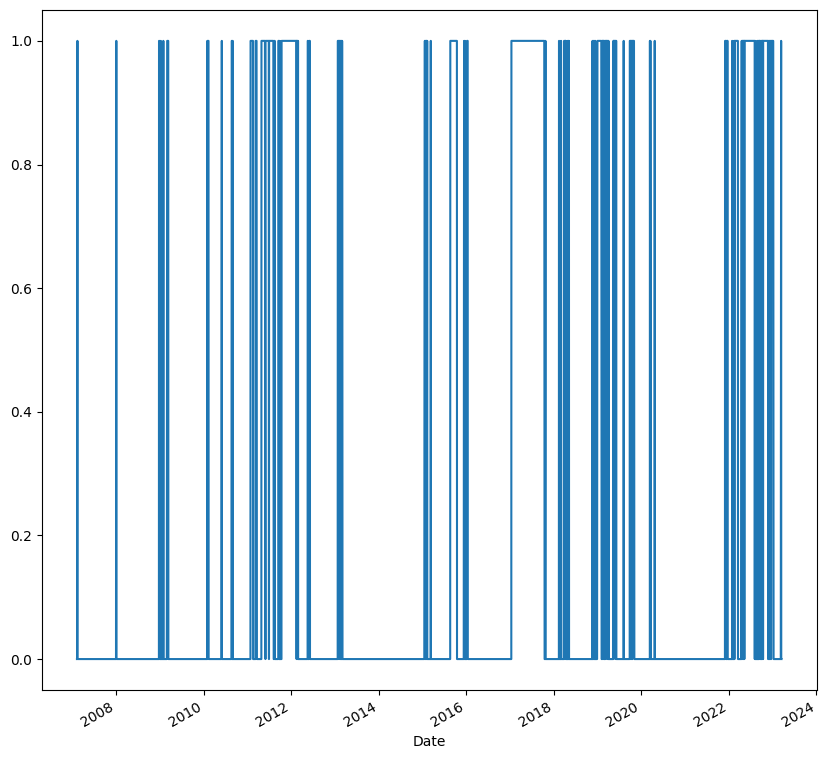

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         
predictions['Predictions'].plot()

<Axes: xlabel='Date'>

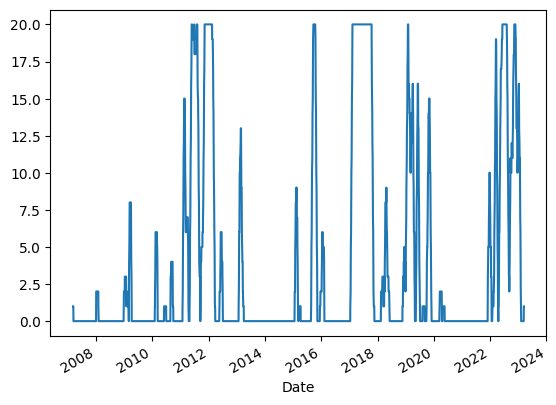

In [ ]:
sum_of_upward_days.plot()

In [ ]:
sum_of_upward_days = sum_of_upward_days.to_frame()

In [ ]:
# create a list of our conditions
conditions = [
    (sum_of_upward_days['Predictions'] >= 14),
    (sum_of_upward_days['Predictions'] <= 6),
    ((sum_of_upward_days['Predictions'] > 6) & (sum_of_upward_days['Predictions'] < 14))
    ]

# create a list of the values we want to assign for each condition
values = ['buy', 'sell', 'hold']

# create a new column and use np.select to assign values to it using our lists as arguments
sum_of_upward_days['signal'] = np.select(conditions, values)


In [ ]:
sum_of_upward_days= sum_of_upward_days.dropna()
sum_of_upward_days

,Predictions,signal
Date,,
2007-03-09 00:00:00-05:00,1.0,sell
2007-03-12 00:00:00-04:00,1.0,sell
2007-03-13 00:00:00-04:00,1.0,sell
2007-03-14 00:00:00-04:00,0.0,sell
2007-03-15 00:00:00-04:00,0.0,sell
...,...,...
2023-03-10 00:00:00-05:00,0.0,sell
2023-03-13 00:00:00-04:00,0.0,sell
2023-03-14 00:00:00-04:00,1.0,sell


In [ ]:
actions_and_returns = pd.concat([sum_of_upward_days, spy_clean['close']], axis=1)

In [ ]:
actions_and_returns[num_of_days:-1]

,Predictions,signal,close
Date,,,
2021-03-23 00:00:00-04:00,0.0,sell,378.036102
2021-03-24 00:00:00-04:00,0.0,sell,376.114349
2021-03-25 00:00:00-04:00,0.0,sell,378.230225
2021-03-26 00:00:00-04:00,0.0,sell,384.325378
2021-03-29 00:00:00-04:00,0.0,sell,384.131256
...,...,...,...
2023-03-09 00:00:00-05:00,0.0,sell,390.071289
2023-03-10 00:00:00-05:00,0.0,sell,384.442780
2023-03-13 00:00:00-04:00,0.0,sell,383.894836


In [ ]:
actions_and_returns = actions_and_returns.dropna()
actions_and_returns

,Predictions,signal,close
Date,,,
2007-03-09 00:00:00-05:00,1.0,sell,102.577065
2007-03-12 00:00:00-04:00,1.0,sell,102.730042
2007-03-13 00:00:00-04:00,1.0,sell,100.733627
2007-03-14 00:00:00-04:00,0.0,sell,101.484123
2007-03-15 00:00:00-04:00,0.0,sell,101.622551
...,...,...,...
2023-03-10 00:00:00-05:00,0.0,sell,384.442780
2023-03-13 00:00:00-04:00,0.0,sell,383.894836
2023-03-14 00:00:00-04:00,1.0,sell,390.240662


### **Calculate Return on the test set - last 500 days**
Will be done in the following manner:
Run in a for loop across all prediction and wait for a **BUY** signal

When we see one we save current price and our position

When we see the first **SELL** signal we calculate return based on the close price of that specific day and save it

After iterating on the whole set we compare the return to the return we would have got without selling at all during this period

In [ ]:
num_of_days = -500

In [ ]:
spy_500_days = merged_data['Close'][num_of_days:].to_frame()
spy_500_days

,Close
Date,
2021-03-23 00:00:00-04:00,378.036102
2021-03-24 00:00:00-04:00,376.114349
2021-03-25 00:00:00-04:00,378.230225
2021-03-26 00:00:00-04:00,384.325378
2021-03-29 00:00:00-04:00,384.131256
...,...
2023-03-10 00:00:00-05:00,384.442780
2023-03-13 00:00:00-04:00,383.894836
2023-03-14 00:00:00-04:00,390.240662


In [ ]:
entered = spy_500_days['Close'].iloc[num_of_days]
entered

378.0361022949219

In [ ]:
sold = spy_500_days['Close'].iloc[-1]
sold

394.6039733886719

In [ ]:
no_sell_return = (sold / entered )*100

In [ ]:
no_sell_return

104.38261610284636

### **Model profits according to the Recommendations**

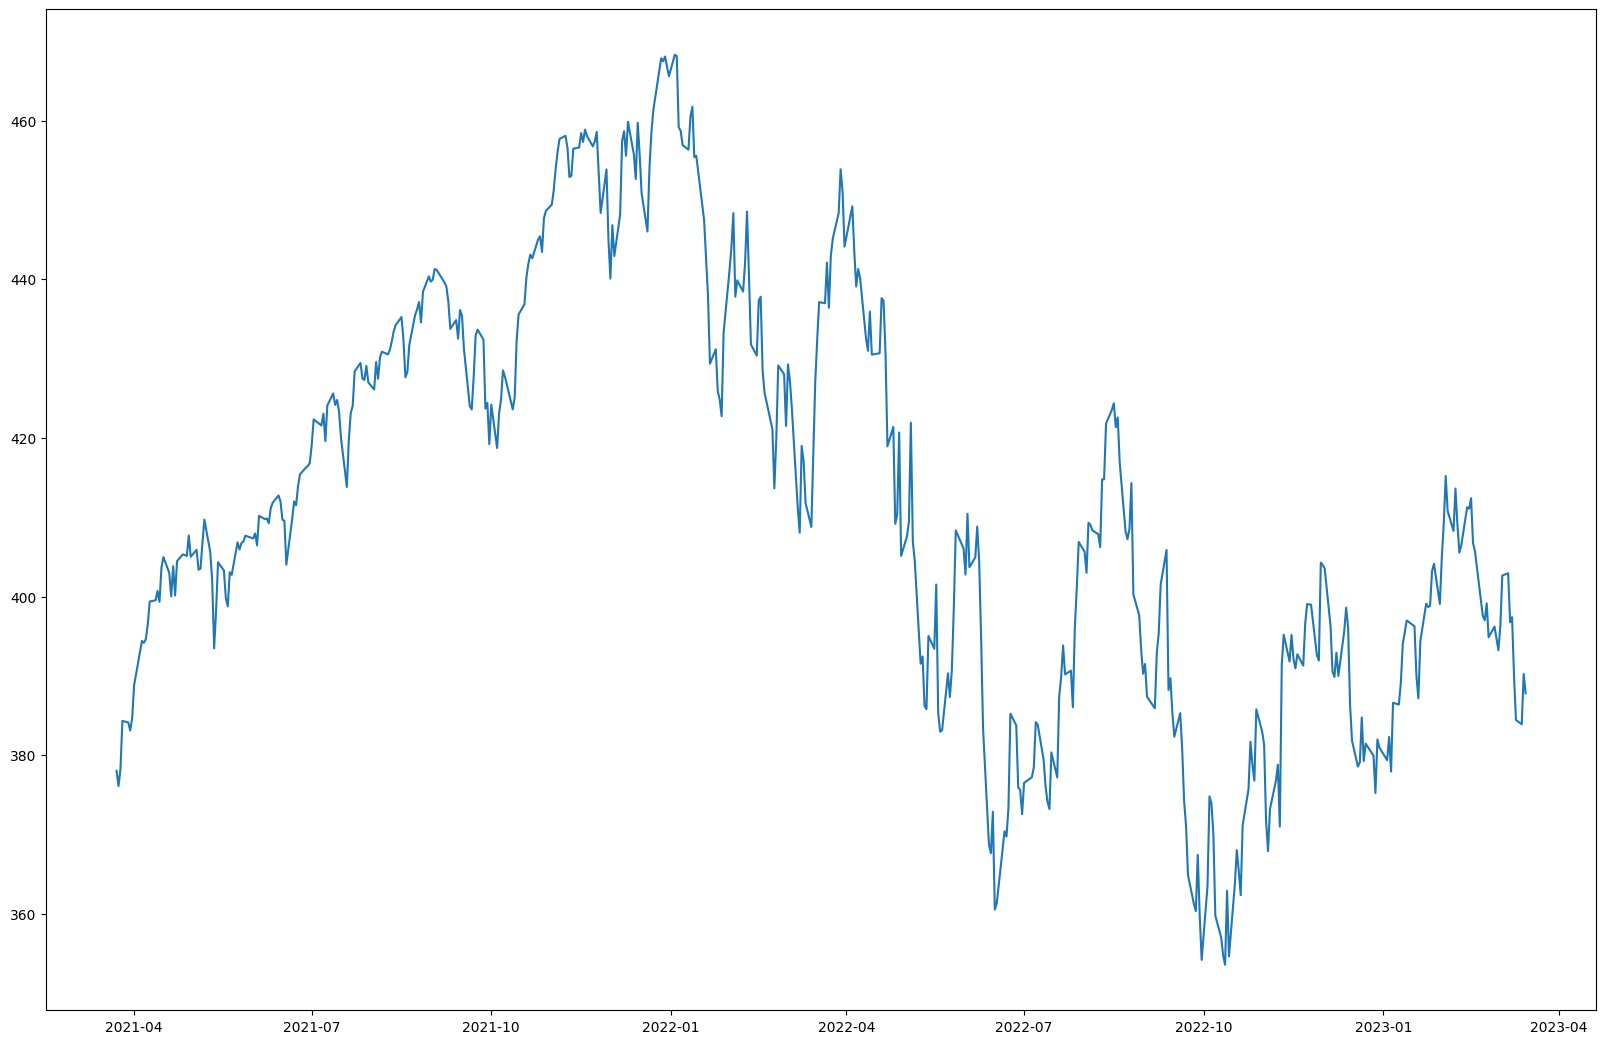

In [ ]:
plt.figure(figsize=(20,13))
plt.plot(merged_data['Close'][num_of_days:-1])

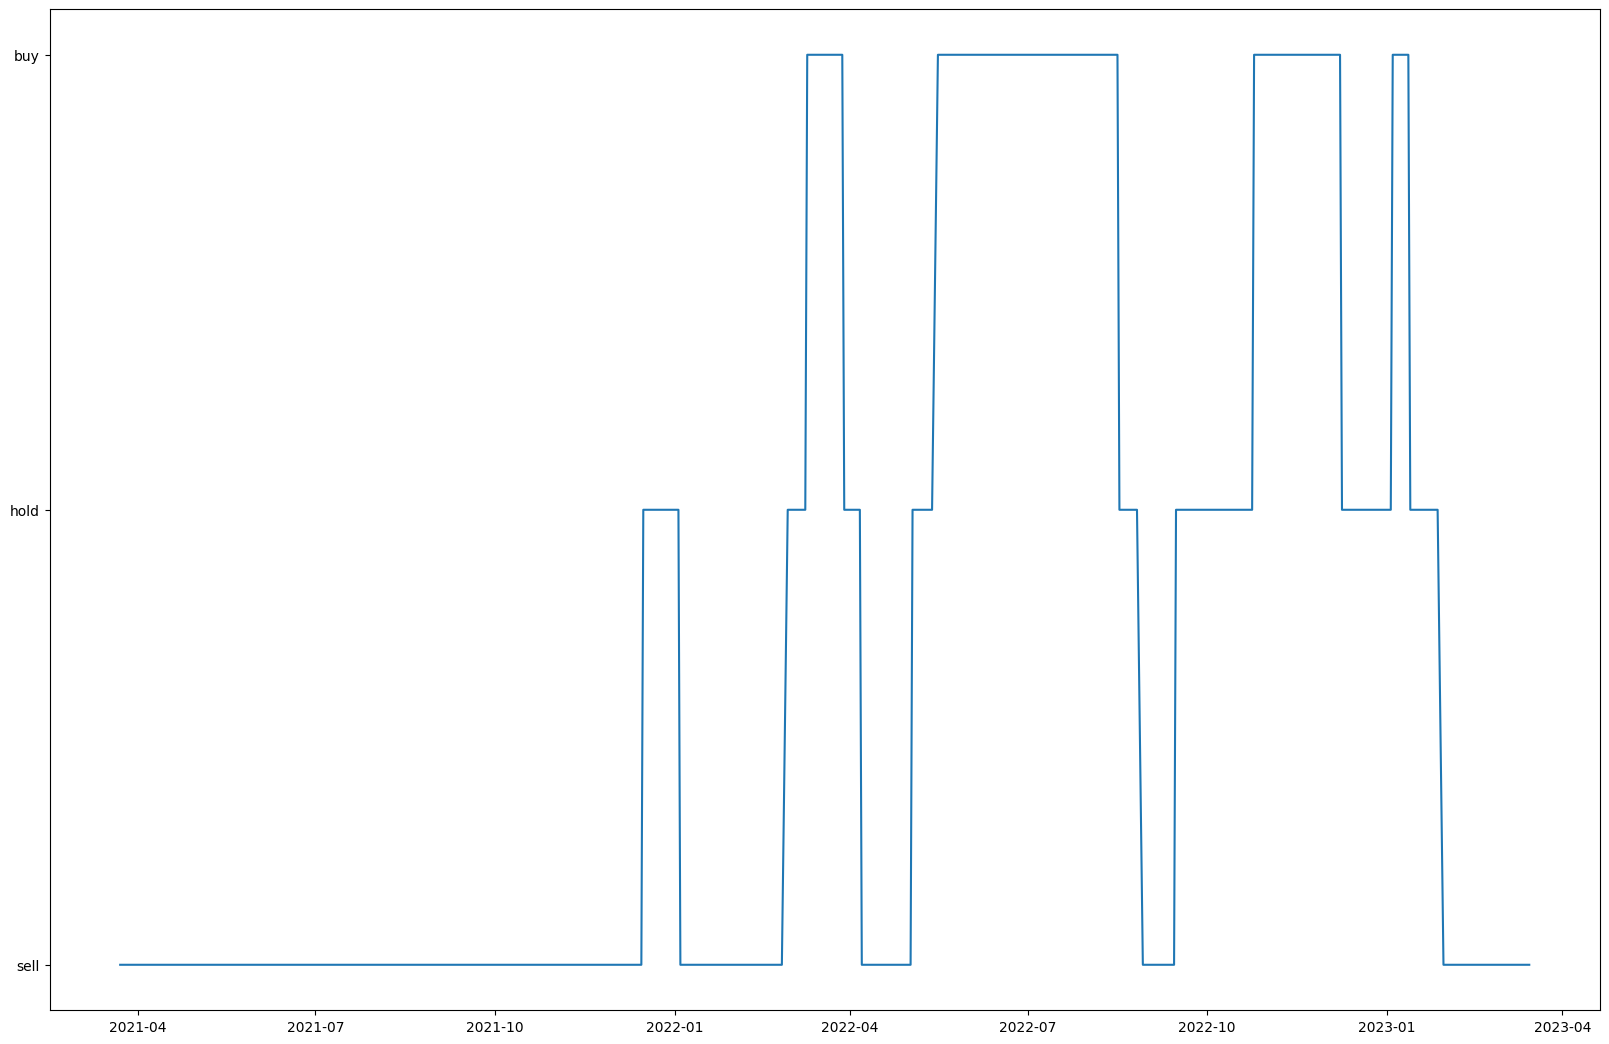

In [ ]:
plt.figure(figsize=(20,13))
plt.plot(actions_and_returns['signal'][num_of_days:-1])

In [ ]:
actions_and_returns =actions_and_returns[num_of_days:]
actions_and_returns

,Predictions,signal,close
Date,,,
2021-03-23 00:00:00-04:00,0.0,sell,378.036102
2021-03-24 00:00:00-04:00,0.0,sell,376.114349
2021-03-25 00:00:00-04:00,0.0,sell,378.230225
2021-03-26 00:00:00-04:00,0.0,sell,384.325378
2021-03-29 00:00:00-04:00,0.0,sell,384.131256
...,...,...,...
2023-03-10 00:00:00-05:00,0.0,sell,384.442780
2023-03-13 00:00:00-04:00,0.0,sell,383.894836
2023-03-14 00:00:00-04:00,1.0,sell,390.240662


In [ ]:
model2_predictions = actions_and_returns

### Function to calculate return


In [ ]:
current_position = 'out' # can be in or out
total_return = 0.0
price_of_day_entered = 0.0

for index,day in actions_and_returns.iterrows():
  if (day['signal']== 'buy' and current_position == 'out'):
    current_position = 'in'
    price_of_day_entered = day['close']
    print(f"Entered on {index}, price: {day['close']} Total return: {total_return}")
  
  if (day['signal'] == 'sell' and current_position == 'in'):
    current_position = 'out'
    total_return = total_return + ( (day['close'] / price_of_day_entered ) * 100 ) - 100
    print(f"Sold on {index}, price: {day['close']}  Total return: {total_return} \n -------------------------------------")


#Close the position on the last day if it remains open
if (current_position == 'in'):
    current_position = 'out'
    total_return = total_return + ( ( actions_and_returns['close'].iloc[-2] / price_of_day_entered ) * 100 ) - 100
    print(f"Sold on {actions_and_returns.iloc[-1]}, price: {actions_and_returns['close'].iloc[-1]}  Total return: {total_return}")
print(f"Total return: {total_return}")


Entered on 2022-03-10 00:00:00-05:00, price: 417.0956726074219 Total return: 0.0
Sold on 2022-04-07 00:00:00-04:00, price: 441.2933654785156  Total return: 5.801473009735375 
 -------------------------------------
Entered on 2022-05-16 00:00:00-04:00, price: 393.4244079589844 Total return: 5.801473009735375
Sold on 2022-08-29 00:00:00-04:00, price: 397.63238525390625  Total return: 6.871050089803205 
 -------------------------------------
Entered on 2022-10-25 00:00:00-04:00, price: 381.7037658691406 Total return: 6.871050089803205
Sold on 2023-01-30 00:00:00-05:00, price: 399.06695556640625  Total return: 11.419915270037833 
 -------------------------------------
Total return: 11.419915270037833


# **News Sentiment Data Model**

In [ ]:
import requests
import json
import datetime

# Set your API key
API_KEY = "7a11b74165e14a72a99a0019af4a5a28"

# Set the news source and endpoint
NEWS_SOURCE = "https://newsapi.org/v2/top-headlines"
NEWS_PARAMS = {"category": "business", "country": "us"}

# Set the date format for serialization
DATE_FORMAT = "%Y-%m-%d"

# Fetch the news headlines
response = requests.get(NEWS_SOURCE, params={"apiKey": API_KEY, **NEWS_PARAMS})
articles = response.json()["articles"]

# Group the articles by date
articles_by_date = {}
for article in articles:
    date = datetime.datetime.strptime(article["publishedAt"], "%Y-%m-%dT%H:%M:%SZ").date()
    date_str = date.strftime(DATE_FORMAT)
    if date_str not in articles_by_date:
        articles_by_date[date_str] = []
    articles_by_date[date_str].append(article["title"])

# Serialize the articles by date
with open("financial_news.json", "w") as f:
    json.dump(articles_by_date, f, indent=2)


In [ ]:
articles_by_date

{'2023-04-14': ["JPMorgan Stock Rises After Posting Record Quarterly Revenue - Barron's",
  'Stock Market Today: JPMorgan Posts Record Revenue; Dow Futures Waver - The Wall Street Journal',
  'Citigroup profit beats estimates on higher interest income from loans - Yahoo Finance',
  'D.C. faces big challenges as remote work demand persists, poll finds - The Washington Post',
  "Wells Fargo shares rise after bank's first quarter profit and revenue top the Street - CNBC",
  "Exclusive: Fed can 'hit the mark and hold' with one more rate hike, Bostic says - Reuters.com",
  'Banking crisis forces ECB policymakers to rethink rate hikes, but focus still firmly on inflation - CNBC',
  "Biden may regulate AI for ‘disinformation,' 'discriminatory outcomes' - Fox News",
  "UnitedHealth Raises Guidance After Earnings Beat. The Stock Is Rising. - Barron's",
  "BlackRock Stock Rises on Earnings Beat - Barron's",
  'Twitter Blue’s new 10,000 character limit turns tweets into essays - The Verge',
  "Do

 ## Getting the News Sentiment Data


###Small introduction

In nowadays there are a lot of data with free access. One of the easiest and faster ways to find and use data - connect to some API and pull data that are ready to use. All you need, is to clean and hendel this data due to your requirenments and here you go!

We are using one of the biggest and trusted source in world of text data - modern newspaper called New York Times. Their API is open source that include data devided in two time frames: 
1. From 1851 till 1980
2. From 1981 till present 

To use NYT API we'll establish straight connection

In [ ]:
import requests 
import time
import json

def api_connect(start, end,page):
  api_key = "1XzOrHk31rOI4zTG6LGjeciBlMz5gpH8"
  url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
  sort = "oldest"

  params= {
    "q": "stock market, S&P 500",
    "begin_date": start,
    "end_date": end,
    "facet": "true",
    "facet_fields": "organizations",
    "fl": "snippet,lead_paragraph,pub_date,keywords: name = 'organizations'",
    "page": str(page),
    "page_size": "20",
    "api-key": api_key
  }

  response = requests.get(url, params=params)


  if response.status_code == 200:
    data = response.json()
    json.dumps(data, indent=2)
  else:
    print("Error: {}".format(response.status_code))
  
  time.sleep(12)
  return data



## Data Cleaning

Some articles need additional authorization. In this case lead_paragraph value will be next = "(Want to get this newsletter in your inbox? Here\u2019s the sign-up.)". We will clean those rows from our data. 

In [ ]:
import json
import pandas as pd

def delete_text(response_data, text_to_delete):
  another = "Here\u2019s what you need to know at the end of the day."

  for text in response_data['response']['docs']:
    if another in text['snippet']:
      text['snippet'] = text['snippet'].replace(another, '')
    if text_to_delete in text['lead_paragraph']:
      text['lead_paragraph'] = text['lead_paragraph'].replace(text_to_delete, '')

  return response_data


def handle_text(data):

  rows = []
  
  for doc in data['response']['docs']:
    row = {
        'text': doc['snippet'] + ' ' + doc['lead_paragraph'],
        'pub_date': doc['pub_date'],
    }
    rows.append(row)

  df = pd.DataFrame(rows)
  print(df)
  return df



Check if there file with old articles:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def get_offline_articles():
      try:
        ofline_file = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/embeded_articles_new_new.csv')
        return ofline_file
      except pd.errors.EmptyDataError:
        return pd.DataFrame()

In [ ]:
"""# ori's drive
def get_offline_articles():
      try:
        ofline_file = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/embeded_articles_new_new.csv')
        return ofline_file
      except pd.errors.EmptyDataError:
        return pd.DataFrame()"""


In [ ]:
offline_articles = get_offline_articles()
offline_articles.columns = ['pub_date','text','score']

if offline_articles.empty:
  print("The file still empty\n")
else:
  offline_articles

In [ ]:
offline_articles

,pub_date,text,score
0,1994-07-06T05:00:00+0000,In the continuing skirmishes among the nation...,0.0000
1,1994-10-18T05:00:00+0000,"WHEN it comes to stock gauges, most investors...",0.1655
2,1994-11-05T05:00:00+0000,Those double-digit stock market gains of the 1...,0.9794
3,1997-01-14T05:00:00+0000,The Standard & Poor's Composite Index of 500 S...,0.0000
4,1997-05-24T05:00:00+0000,Stock of Cardinal Health rises more than 8 per...,0.0000
...,...,...,...
414,2022-10-14T18:44:50+0000,"The S&P 500 ended the week lower, erasing a sh...",-0.2732
415,2022-10-17T15:03:34+0000,The S&P 500 rose sharply on Monday after bette...,0.0000
416,2022-11-11T15:34:45+0000,Signs of China easing its pandemic restriction...,0.8316
417,2022-12-16T14:00:08+0000,Wall Street’s market forecasts for 2023 are wo...,-0.3716


In [ ]:
offline_articles = offline_articles.drop_duplicates()

In [ ]:
offline_articles

,pub_date,text,score
0,1994-07-06T05:00:00+0000,In the continuing skirmishes among the nation...,0.0000
1,1994-10-18T05:00:00+0000,"WHEN it comes to stock gauges, most investors...",0.1655
2,1994-11-05T05:00:00+0000,Those double-digit stock market gains of the 1...,0.9794
3,1997-01-14T05:00:00+0000,The Standard & Poor's Composite Index of 500 S...,0.0000
4,1997-05-24T05:00:00+0000,Stock of Cardinal Health rises more than 8 per...,0.0000
...,...,...,...
408,2022-06-13T20:06:33+0000,Steep downturns of stocks by 20 percent or mor...,-0.8338
410,2022-08-26T14:08:28+0000,"The bear market endures, yet the S&P 500 index...",0.0000
411,2022-09-23T13:57:47+0000,test Stock markets around the world slid on Fr...,0.0516
416,2022-11-11T15:34:45+0000,Signs of China easing its pandemic restriction...,0.8316


In [ ]:
offline_articles = offline_articles.sort_values(by='pub_date')

In [ ]:
offline_articles = offline_articles.set_index('pub_date')

In [ ]:
offline_articles

,text,score
pub_date,,
1993-12-29T05:00:00+0000,"Stocks inched higher yesterday, with the Dow ...",0.0000
1994-07-06T05:00:00+0000,In the continuing skirmishes among the nation...,0.0000
1994-10-18T05:00:00+0000,"WHEN it comes to stock gauges, most investors...",0.1655
1994-11-05T05:00:00+0000,Those double-digit stock market gains of the 1...,0.9794
1995-11-19T05:00:00+0000,Prices went up and up. And never was seen a d...,0.3412
...,...,...
2022-10-17T15:03:34+0000,The S&P 500 rose sharply on Monday after bette...,0.0000
2022-10-28T20:23:15+0000,"Investors, who have been closely watching comp...",0.8074
2022-11-11T15:34:45+0000,Signs of China easing its pandemic restriction...,0.8316


In [ ]:
#del_text = "(Want to get this newsletter in your inbox? Here\u2019s the sign-up.)"
#The dates should be passed to the function in the next way: yyyymmdd
#articles = api_connect("20000101", "20221231", 0)#THIS PAGES ARE ALREAY IN FILE

#clean_data = delete_text(articles, del_text)
#handeled_text_temp = handle_text(clean_data)
#handeled_text = handeled_text_temp

In [ ]:
#del_text = "(Want to get this newsletter in your inbox? Here\u2019s the sign-up.)"
#The dates should be passed to the function in the next way: yyyymmdd

#for i in range(1,45):#THIS PAGES ARE ALREAY IN FILE
#  article = api_connect("19930101", "20221231", i)
#  clean_data = delete_text(article, del_text)
#  handeled_text_temp = handle_text(clean_data)
#  handeled_text = pd.concat([handeled_text, handeled_text_temp])

In [ ]:
#handeled_text

In [ ]:
#handeled_text.index = range(len(handeled_text))

In [ ]:
#handeled_text

Here is sentimental analysis using NLTK:

In [ ]:
#import nltk
#nltk.download('vader_lexicon')
#nltk.download('punkt')
#from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
#sid = SentimentIntensityAnalyzer()

#def analyzer(text):
#  scores = sid.polarity_scores(text)
#  return scores['compound']

#handeled_text = handeled_text.set_index('pub_date')
#handeled_text['score'] = 0 
'''for i, abstract in enumerate(handeled_text['text']):
    score = analyzer(abstract)
    handeled_text.at[i, 'score'] = score

#handeled_text = handeled_text.set_index('pub_date')'''

"for i, abstract in enumerate(handeled_text['text']):\n    score = analyzer(abstract)\n    handeled_text.at[i, 'score'] = score\n\n#handeled_text = handeled_text.set_index('pub_date')"

In [ ]:
'''handeled_text = handeled_text.set_index('pub_date')'''

"handeled_text = handeled_text.set_index('pub_date')"

In [ ]:
'''sorted_df = handeled_text.sort_values(by='pub_date')'''

"sorted_df = handeled_text.sort_values(by='pub_date')"

In [ ]:
'''sorted_df'''

'sorted_df'

In [ ]:
'''sorted_df = sorted_df.dropna(axis = 0)'''

'sorted_df = sorted_df.dropna(axis = 0)'

In [ ]:
'''sorted_df'''

'sorted_df'

In [ ]:
'''sorted_df_copy = sorted_df
sorted_df_copy = sorted_df_copy.drop_duplicates()'''

'sorted_df_copy = sorted_df\nsorted_df_copy = sorted_df_copy.drop_duplicates()'

In [ ]:
# remove empty articles
'''for i in range(0, len(sorted_df_copy)):
  if i  > len(sorted_df_copy):
    continue
  if len(sorted_df_copy.iloc[i]['text']) == 2 or len(sorted_df_copy.iloc[i]['text']) == 1:
    sorted_df_copy = sorted_df_copy.drop(sorted_df_copy.index[i])
  print(str(i) +")  len: "+"text:  "+ sorted_df_copy.iloc[i]['text'] + str(len(sorted_df_copy.iloc[i]['text']))+ "\n")'''

'for i in range(0, len(sorted_df_copy)):\n  if i  > len(sorted_df_copy):\n    continue\n  if len(sorted_df_copy.iloc[i][\'text\']) == 2 or len(sorted_df_copy.iloc[i][\'text\']) == 1:\n    sorted_df_copy = sorted_df_copy.drop(sorted_df_copy.index[i])\n  print(str(i) +")  len: "+"text:  "+ sorted_df_copy.iloc[i][\'text\'] + str(len(sorted_df_copy.iloc[i][\'text\']))+ "\n")'

Write embeded data to file:

In [ ]:
"""with open('/content/drive/MyDrive/ColabNotebooks/embeded_articles_new.csv', mode='a') as f:
  offline_articles.to_csv(f, header=True, index=True)"""

## **Combining the sentiment with the stock data**

#### To merge these two dataframes based on the **Date** of each row, we need to create a new column in both dataframes that represents the date and then we can merge based on that column that exists on both data frames

In [ ]:
handeled_text = offline_articles

In [ ]:
offline_articles

,text,score
pub_date,,
1993-12-29T05:00:00+0000,"Stocks inched higher yesterday, with the Dow ...",0.0000
1994-07-06T05:00:00+0000,In the continuing skirmishes among the nation...,0.0000
1994-10-18T05:00:00+0000,"WHEN it comes to stock gauges, most investors...",0.1655
1994-11-05T05:00:00+0000,Those double-digit stock market gains of the 1...,0.9794
1995-11-19T05:00:00+0000,Prices went up and up. And never was seen a d...,0.3412
...,...,...
2022-10-17T15:03:34+0000,The S&P 500 rose sharply on Monday after bette...,0.0000
2022-10-28T20:23:15+0000,"Investors, who have been closely watching comp...",0.8074
2022-11-11T15:34:45+0000,Signs of China easing its pandemic restriction...,0.8316


In [ ]:
spy_data.tail(20)

,Open,High,Low,Close,Volume,vix,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI,Year
Date,,,,,,,,,,,,
2023-03-17 00:00:00-04:00,393.220001,394.399994,388.549988,389.989990,140553400,6.42,-57.273964,-3.030372,-0.642286,-2.388085,44.363817,2023
2023-03-20 00:00:00-04:00,390.799988,394.170013,390.070007,393.739990,93055800,6.02,-25.298681,-2.697577,-0.247593,-2.449984,48.317861,2023
2023-03-21 00:00:00-04:00,397.239990,399.410004,395.579987,398.910004,91524200,5.26,63.522683,-1.993676,0.365046,-2.358722,53.250776,2023
2023-03-22 00:00:00-04:00,398.730011,402.489990,392.070007,392.109985,111746600,5.47,25.519335,-1.961919,0.317443,-2.279362,46.908851,2023
2023-03-23 00:00:00-04:00,395.089996,399.290009,390.350006,393.170013,119351300,5.74,7.344655,-1.830119,0.359394,-2.189513,47.949519,2023
2023-03-24 00:00:00-04:00,391.839996,395.839996,389.399994,395.750000,107682400,5.42,-2.913040,-1.500189,0.551459,-2.051648,50.493070,2023
2023-03-27 00:00:00-04:00,398.119995,398.920013,395.559998,396.489990,74010400,5.09,56.455594,-1.165571,0.708862,-1.874433,51.229224,2023
2023-03-28 00:00:00-04:00,395.769989,396.489990,393.690002,395.600006,62871700,4.92,26.189696,-0.961119,0.730651,-1.691770,50.261221,2023
2023-03-29 00:00:00-04:00,399.929993,401.600006,398.679993,401.350006,77497900,4.65,106.454689,-0.331293,1.088381,-1.419675,56.040596,2023


### Making sure both column are the same type

In [ ]:
new_index = pd.to_datetime(handeled_text.index)

In [ ]:
handeled_text['pub_date'] = new_index

In [ ]:
handeled_text

,text,score,pub_date
pub_date,,,
1993-12-29T05:00:00+0000,"Stocks inched higher yesterday, with the Dow ...",0.0000,1993-12-29 05:00:00+00:00
1994-07-06T05:00:00+0000,In the continuing skirmishes among the nation...,0.0000,1994-07-06 05:00:00+00:00
1994-10-18T05:00:00+0000,"WHEN it comes to stock gauges, most investors...",0.1655,1994-10-18 05:00:00+00:00
1994-11-05T05:00:00+0000,Those double-digit stock market gains of the 1...,0.9794,1994-11-05 05:00:00+00:00
1995-11-19T05:00:00+0000,Prices went up and up. And never was seen a d...,0.3412,1995-11-19 05:00:00+00:00
...,...,...,...
2022-10-17T15:03:34+0000,The S&P 500 rose sharply on Monday after bette...,0.0000,2022-10-17 15:03:34+00:00
2022-10-28T20:23:15+0000,"Investors, who have been closely watching comp...",0.8074,2022-10-28 20:23:15+00:00
2022-11-11T15:34:45+0000,Signs of China easing its pandemic restriction...,0.8316,2022-11-11 15:34:45+00:00


In [ ]:
temp = handeled_text

In [ ]:
handeled_text = handeled_text.set_index('pub_date')

### Making sure the names are equal

In [ ]:
handeled_text.index.name = 'Date'

In [ ]:
handeled_text

,text,score
Date,,
1993-12-29 05:00:00+00:00,"Stocks inched higher yesterday, with the Dow ...",0.0000
1994-07-06 05:00:00+00:00,In the continuing skirmishes among the nation...,0.0000
1994-10-18 05:00:00+00:00,"WHEN it comes to stock gauges, most investors...",0.1655
1994-11-05 05:00:00+00:00,Those double-digit stock market gains of the 1...,0.9794
1995-11-19 05:00:00+00:00,Prices went up and up. And never was seen a d...,0.3412
...,...,...
2022-10-17 15:03:34+00:00,The S&P 500 rose sharply on Monday after bette...,0.0000
2022-10-28 20:23:15+00:00,"Investors, who have been closely watching comp...",0.8074
2022-11-11 15:34:45+00:00,Signs of China easing its pandemic restriction...,0.8316


In [ ]:
handeled_text['Year'] = handeled_text.index.year
handeled_text['Month'] = handeled_text.index.month
handeled_text['Day'] = handeled_text.index.day

In [ ]:
handeled_text

,text,score,Year,Month,Day
Date,,,,,
1993-12-29 05:00:00+00:00,"Stocks inched higher yesterday, with the Dow ...",0.0000,1993,12,29
1994-07-06 05:00:00+00:00,In the continuing skirmishes among the nation...,0.0000,1994,7,6
1994-10-18 05:00:00+00:00,"WHEN it comes to stock gauges, most investors...",0.1655,1994,10,18
1994-11-05 05:00:00+00:00,Those double-digit stock market gains of the 1...,0.9794,1994,11,5
1995-11-19 05:00:00+00:00,Prices went up and up. And never was seen a d...,0.3412,1995,11,19
...,...,...,...,...,...
2022-10-17 15:03:34+00:00,The S&P 500 rose sharply on Monday after bette...,0.0000,2022,10,17
2022-10-28 20:23:15+00:00,"Investors, who have been closely watching comp...",0.8074,2022,10,28
2022-11-11 15:34:45+00:00,Signs of China easing its pandemic restriction...,0.8316,2022,11,11


In [ ]:
spy_data['Year'] = spy_data.index.year
spy_data['Month'] = spy_data.index.month
spy_data['Day'] = spy_data.index.day

In [ ]:
spy_data

,Open,High,Low,Close,Volume,vix,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI,Year,Month,Day
Date,,,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.140234,25.140234,25.015158,25.122366,1003200,NaN,NaN,NaN,NaN,NaN,NaN,1993,1,29
1993-02-01 00:00:00-05:00,25.140216,25.301027,25.140216,25.301027,480500,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,1
1993-02-02 00:00:00-05:00,25.283150,25.372490,25.229546,25.354622,201300,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,2
1993-02-03 00:00:00-05:00,25.390365,25.640516,25.372497,25.622648,529400,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,3
1993-02-04 00:00:00-05:00,25.711992,25.783464,25.426105,25.729860,531500,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229,3.497679,1.627821,1.869859,61.428033,2023,4,10
2023-04-11 00:00:00-04:00,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640,3.647172,1.421851,2.225321,61.540001,2023,4,11
2023-04-12 00:00:00-04:00,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991,3.589512,1.091353,2.498159,58.751971,2023,4,12


## **Ready to merge**
<img src="https://i.ytimg.com/vi/sJC5VSEbFyY/maxresdefault.jpg" width=300>

In [ ]:
merged_data = pd.merge(spy_data, handeled_text, on=['Year', 'Month', 'Day'], how='left')
merged_data

,Open,High,Low,Close,Volume,vix,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI,Year,Month,Day,text,score
0,25.140234,25.140234,25.015158,25.122366,1003200,NaN,NaN,NaN,NaN,NaN,NaN,1993,1,29,NaN,NaN
1,25.140216,25.301027,25.140216,25.301027,480500,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,1,NaN,NaN
2,25.283150,25.372490,25.229546,25.354622,201300,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,2,NaN,NaN
3,25.390365,25.640516,25.372497,25.622648,529400,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,3,NaN,NaN
4,25.711992,25.783464,25.426105,25.729860,531500,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7616,406.609985,409.690002,405.970001,409.609985,63681000,4.34,97.922229,3.497679,1.627821,1.869859,61.428033,2023,4,10,NaN,NaN
7617,410.260010,411.179993,408.920013,409.720001,59297900,4.28,99.868640,3.647172,1.421851,2.225321,61.540001,2023,4,11,NaN,NaN
7618,411.869995,412.170013,407.440002,408.049988,86420400,4.31,83.760991,3.589512,1.091353,2.498159,58.751971,2023,4,12,NaN,NaN
7619,409.179993,413.839996,407.989990,413.470001,85814800,4.08,98.119991,3.935797,1.150110,2.785687,64.390558,2023,4,13,NaN,NaN


In [ ]:
merged_data = merged_data.drop(['text'], axis=1)

In [ ]:
merged_data = merged_data[0:len(spy_data)]

In [ ]:
len(merged_data)

7607

In [ ]:
len(spy_data)

7607

In [ ]:
merged_data['Date'] = spy_data.index

In [ ]:
merged_data = merged_data.set_index("Date")

In [ ]:
merged_data

,Open,High,Low,Close,Volume,vix,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI,Year,Month,Day,score
Date,,,,,,,,,,,,,,,
1993-01-29 00:00:00-05:00,25.140234,25.140234,25.015158,25.122366,1003200,NaN,NaN,NaN,NaN,NaN,NaN,1993,1,29,NaN
1993-02-01 00:00:00-05:00,25.140216,25.301027,25.140216,25.301027,480500,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,1,NaN
1993-02-02 00:00:00-05:00,25.283150,25.372490,25.229546,25.354622,201300,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,2,NaN
1993-02-03 00:00:00-05:00,25.390365,25.640516,25.372497,25.622648,529400,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,3,NaN
1993-02-04 00:00:00-05:00,25.711992,25.783464,25.426105,25.729860,531500,NaN,NaN,NaN,NaN,NaN,NaN,1993,2,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,390.799988,394.170013,390.070007,393.739990,93055800,6.02,-25.298681,-2.697577,-0.247593,-2.449984,48.317861,2023,3,20,NaN
2023-04-11 00:00:00-04:00,397.239990,399.410004,395.579987,398.910004,91524200,5.26,63.522683,-1.993676,0.365046,-2.358722,53.250776,2023,3,21,NaN
2023-04-12 00:00:00-04:00,398.730011,402.489990,392.070007,392.109985,111746600,5.47,25.519335,-1.961919,0.317443,-2.279362,46.908851,2023,3,22,NaN


## Handling missing values
There are days where we do not have an article hence we do not have a score, so we will fill those days with **neutral score - 0**



Text(0.5, 1.0, 'Missing values heatmap')

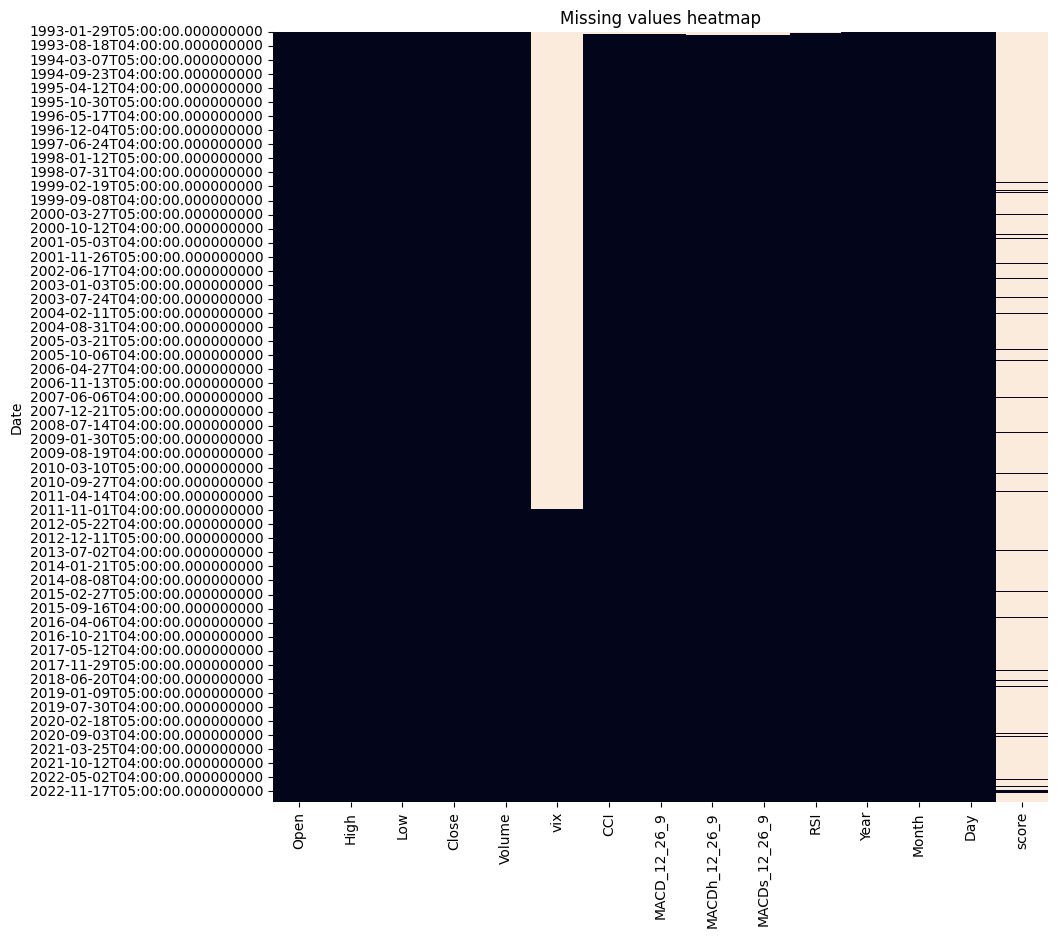

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(merged_data.isna(), cbar = False).set_title("Missing values heatmap")


## According to the graph, VIX will be removed and we will fill the rest of the missing values with zeros.
Choosing to fill median or average will give incorrect data.

In [ ]:
merged_data =merged_data.drop("vix", axis=1)

In [ ]:
merged_data=merged_data.fillna(0)

In [ ]:
merged_data.isna().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
CCI              0
MACD_12_26_9     0
MACDh_12_26_9    0
MACDs_12_26_9    0
RSI              0
Year             0
Month            0
Day              0
score            0
dtype: int64

### **Adding horizons for each row**

In [ ]:
horizons = [ 2,5,20,125,250,500]

for horizon in horizons:
    rolling_averages = merged_data.rolling(horizon).mean()
    
    ratio_column = f"close_ratio_{horizon}"
    merged_data[ratio_column] = merged_data["Close"] / rolling_averages["Close"]
    
    trend_column = f"trend_{horizon}"
    merged_data[trend_column] = spy_clean.shift(1).rolling(horizon).sum()["target_tomrrow"]



# **Generating target columns**
#### Our goal is to predict next month direction.
#### We'll now add this column and also add a boolean column to each one so we can say if the price went up or down during that period. 


In [ ]:
merged_data["next_month"] = merged_data["Close"].shift(-20) # Last 20 days are a month of trading days

## **Now, based on those column, we can calculate direction -> 3 more boolean (0 or 1 ) columns**

In [ ]:
merged_data["target_next_month"] = (merged_data["next_month"] > merged_data["Close"]).astype(int)

In [ ]:
merged_data = merged_data.dropna()

In [ ]:
merged_data

,Open,High,Low,Close,Volume,CCI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI,...,close_ratio_20,trend_20,close_ratio_125,trend_125,close_ratio_250,trend_250,close_ratio_500,trend_500,next_month,target_next_month
Date,,,,,,,,,,,,,,,,,,,,,
1997-03-03 00:00:00-05:00,49.447619,50.075526,49.408375,50.036282,1210400,-33.821037,0.434136,-0.179361,0.613497,52.237968,...,0.996619,12.0,1.082476,75.0,1.151628,136.0,1.276490,275.0,47.814999,0
1997-03-04 00:00:00-05:00,50.173633,50.310988,49.663460,49.761570,1478700,-30.462658,0.360817,-0.202145,0.562961,49.594942,...,0.990770,11.0,1.074886,74.0,1.144319,135.0,1.268178,275.0,46.958172,0
1997-03-05 00:00:00-05:00,50.055887,50.605305,49.889099,50.605305,1254800,14.641149,0.366567,-0.157115,0.523682,56.820998,...,1.006645,11.0,1.091190,75.0,1.162490,136.0,1.288317,275.0,47.214230,0
1997-03-06 00:00:00-05:00,50.624939,50.801537,50.154009,50.310986,1528500,14.654156,0.343416,-0.144213,0.487629,53.917293,...,0.999240,11.0,1.083102,74.0,1.154587,135.0,1.279487,275.0,47.805141,0
1997-03-07 00:00:00-05:00,50.507215,50.958523,50.389483,50.762302,1859300,44.426836,0.357367,-0.104209,0.461577,57.503570,...,1.006517,11.0,1.091073,74.0,1.163713,136.0,1.289600,275.0,47.992271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10 00:00:00-05:00,404.516159,405.960658,402.513791,405.711609,89257800,-22.432917,4.099300,-0.784613,4.883913,52.764164,...,0.997648,9.0,1.048236,54.0,1.021692,115.0,0.986739,250.0,393.739990,0
2023-03-13 00:00:00-04:00,401.527570,402.623394,397.303700,397.572662,82655900,-111.469352,2.986698,-1.517772,4.504470,44.376935,...,0.977819,8.0,1.027413,53.0,1.001358,115.0,0.966804,249.0,398.910004,1
2023-03-14 00:00:00-04:00,398.001004,399.604899,395.510509,397.024750,83742300,-137.737234,2.037257,-1.973770,4.011027,43.871357,...,0.976670,8.0,1.026241,54.0,1.000208,115.0,0.965377,250.0,392.109985,0


## **Test Train split**
We have data from 1993 untill today, about 30 years of data

Unlike regular data frame, Time series data cannot be splitted randomly across the dataframe while sampling random rows, as this can be resulted in the model 'cheating' and knowing what will happen in the future.

### Building the prediction functions

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#model_day = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = spy_clean.iloc[-1000:-400] # all days up to the last 400 days
test = spy_clean.iloc[-400:] # last 400 days
# Relevant columns for the model to look at

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):  # 10 years of data for training, the following year is the test data
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target_next_month"])
    preds = model.predict_proba(test[predictors])[:,1]   # return model's probability
    preds[preds >=.65] = 1  # only decied '1' if the model is more than 60% "sure" the market will go up
    preds[preds <.65] = 0   # else, it will go down
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target_next_month"], preds], axis=1)
    return combined

### Models & Predictions

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_fundamental_2 = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)

In [ ]:
merged_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'CCI', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'RSI', 'Year', 'Month', 'Day',
       'score', 'close_ratio_2', 'trend_2', 'close_ratio_5', 'trend_5',
       'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500',
       'next_month', 'target_next_month'],
      dtype='object')

In [ ]:
predictors =  ['Open', 'High', 'Low', 'Close', 'Volume', 'CCI', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'RSI', 'close_ratio_2', 'close_ratio_5', 'close_ratio_20',
       'close_ratio_125', 'close_ratio_250', 'close_ratio_500', 'trend_2', 'trend_5', 'trend_20', 'trend_125',
       'trend_250', 'trend_500']

''''predictors = ['Open', 'High', 'Low', 'Close', 'Volume', 'CCI', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'RSI', 'Year', 'Month', 'Day',
       'score', 'close_ratio_2', 'close_ratio_5', 'close_ratio_20',
       'close_ratio_125', 'close_ratio_250', 'close_ratio_500', 'next_month',
       'target_next_month']

predictors = ['open', 'high', 'low', 'close', 'volume', 'cci', 'macd_12_26_9',
       'macdh_12_26_9', 'macds_12_26_9', 'rsi',
       'close_ratio_2', 'trend_2', 'close_ratio_5',
       'trend_5', 'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',
       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500']'''


"'predictors = ['Open', 'High', 'Low', 'Close', 'Volume', 'CCI', 'MACD_12_26_9',\n       'MACDh_12_26_9', 'MACDs_12_26_9', 'RSI', 'Year', 'Month', 'Day',\n       'score', 'close_ratio_2', 'close_ratio_5', 'close_ratio_20',\n       'close_ratio_125', 'close_ratio_250', 'close_ratio_500', 'next_month',\n       'target_next_month']\n\npredictors = ['open', 'high', 'low', 'close', 'volume', 'cci', 'macd_12_26_9',\n       'macdh_12_26_9', 'macds_12_26_9', 'rsi',\n       'close_ratio_2', 'trend_2', 'close_ratio_5',\n       'trend_5', 'close_ratio_20', 'trend_20', 'close_ratio_125', 'trend_125',\n       'close_ratio_250', 'trend_250', 'close_ratio_500', 'trend_500']"

In [ ]:
predictions = backtest(merged_data,model_fundamental_2,predictors)


In [ ]:
precision_score(predictions["target_next_month"], predictions["Predictions"])

0.682664054848188

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
tn, fp, fn, tp = confusion_matrix(predictions["target_next_month"], predictions["Predictions"]).ravel()
specificity = tn / (tn+fp)

In [ ]:
specificity

0.7693950177935943

## Calculate action signals

In [ ]:
sum_of_upward_days = predictions.shift(1).rolling(20).sum()["Predictions"]
sum_of_upward_days

Date
2007-02-08 00:00:00-05:00    NaN
2007-02-09 00:00:00-05:00    NaN
2007-02-12 00:00:00-05:00    NaN
2007-02-13 00:00:00-05:00    NaN
2007-02-14 00:00:00-05:00    NaN
                            ... 
2023-03-10 00:00:00-05:00    0.0
2023-03-13 00:00:00-04:00    0.0
2023-03-14 00:00:00-04:00    0.0
2023-03-15 00:00:00-04:00    0.0
2023-03-16 00:00:00-04:00    0.0
Name: Predictions, Length: 4054, dtype: float64

In [ ]:
sum_of_upward_days = sum_of_upward_days.to_frame()

In [ ]:
# create a list of our conditions
conditions = [
    (sum_of_upward_days['Predictions'] >= 14),
    (sum_of_upward_days['Predictions'] <= 6),
    ((sum_of_upward_days['Predictions'] > 6) & (sum_of_upward_days['Predictions'] < 14))
    ]

# create a list of the values we want to assign for each condition
values = ['buy', 'sell', 'hold']

# create a new column and use np.select to assign values to it using our lists as arguments
sum_of_upward_days['signal'] = np.select(conditions, values)


In [ ]:
sum_of_upward_days= sum_of_upward_days.dropna()
sum_of_upward_days

,Predictions,signal
Date,,
2007-03-09 00:00:00-05:00,6.0,sell
2007-03-12 00:00:00-04:00,6.0,sell
2007-03-13 00:00:00-04:00,6.0,sell
2007-03-14 00:00:00-04:00,6.0,sell
2007-03-15 00:00:00-04:00,6.0,sell
...,...,...
2023-03-10 00:00:00-05:00,0.0,sell
2023-03-13 00:00:00-04:00,0.0,sell
2023-03-14 00:00:00-04:00,0.0,sell


In [ ]:
actions_and_returns = pd.concat([sum_of_upward_days, spy_data['Close']], axis=1)

In [ ]:
actions_and_returns[-500:-1]

,Predictions,signal,Close
Date,,,
2021-04-21 00:00:00-04:00,8.0,hold,403.824066
2021-04-22 00:00:00-04:00,8.0,hold,400.135895
2021-04-23 00:00:00-04:00,7.0,hold,404.474304
2021-04-26 00:00:00-04:00,6.0,sell,405.318634
2021-04-27 00:00:00-04:00,5.0,sell,405.231384
...,...,...,...
2023-04-06 00:00:00-04:00,NaN,NaN,409.190002
2023-04-10 00:00:00-04:00,NaN,NaN,409.609985
2023-04-11 00:00:00-04:00,NaN,NaN,409.720001


In [ ]:
actions_and_returns = actions_and_returns.dropna()
actions_and_returns

,Predictions,signal,Close
Date,,,
2007-03-09 00:00:00-05:00,6.0,sell,102.577065
2007-03-12 00:00:00-04:00,6.0,sell,102.730042
2007-03-13 00:00:00-04:00,6.0,sell,100.733627
2007-03-14 00:00:00-04:00,6.0,sell,101.484123
2007-03-15 00:00:00-04:00,6.0,sell,101.622551
...,...,...,...
2023-03-10 00:00:00-05:00,0.0,sell,384.442780
2023-03-13 00:00:00-04:00,0.0,sell,383.894836
2023-03-14 00:00:00-04:00,0.0,sell,390.240662


### **Calculate Return on the test set - last 500 days**
Will be done in the following manner:
Run in a for loop across all prediction and wait for a **BUY** signal

When we see one we save current price and our position

When we see the first **SELL** signal we calculate return based on the close price of that specific day and save it

After iterating on the whole set we compare the return to the return we would have got without selling at all during this period

In [ ]:
spy_500_days = merged_data['Close'][num_of_days:].to_frame()
spy_500_days

,Close
Date,
2021-03-23 00:00:00-04:00,364.419250
2021-03-24 00:00:00-04:00,371.123352
2021-03-25 00:00:00-04:00,369.275574
2021-03-26 00:00:00-04:00,374.547974
2021-03-29 00:00:00-04:00,376.879333
...,...
2023-03-10 00:00:00-05:00,405.711609
2023-03-13 00:00:00-04:00,397.572662
2023-03-14 00:00:00-04:00,397.024750


In [ ]:
entered = spy_500_days['Close'].iloc[num_of_days]
entered

364.41925048828125

In [ ]:
sold = spy_500_days['Close'].iloc[-1]
sold

394.8729553222656

In [ ]:
no_sell_return = (sold / entered )*100

In [ ]:
no_sell_return

108.35677719911332

### **Model profits according to the Recommendations**

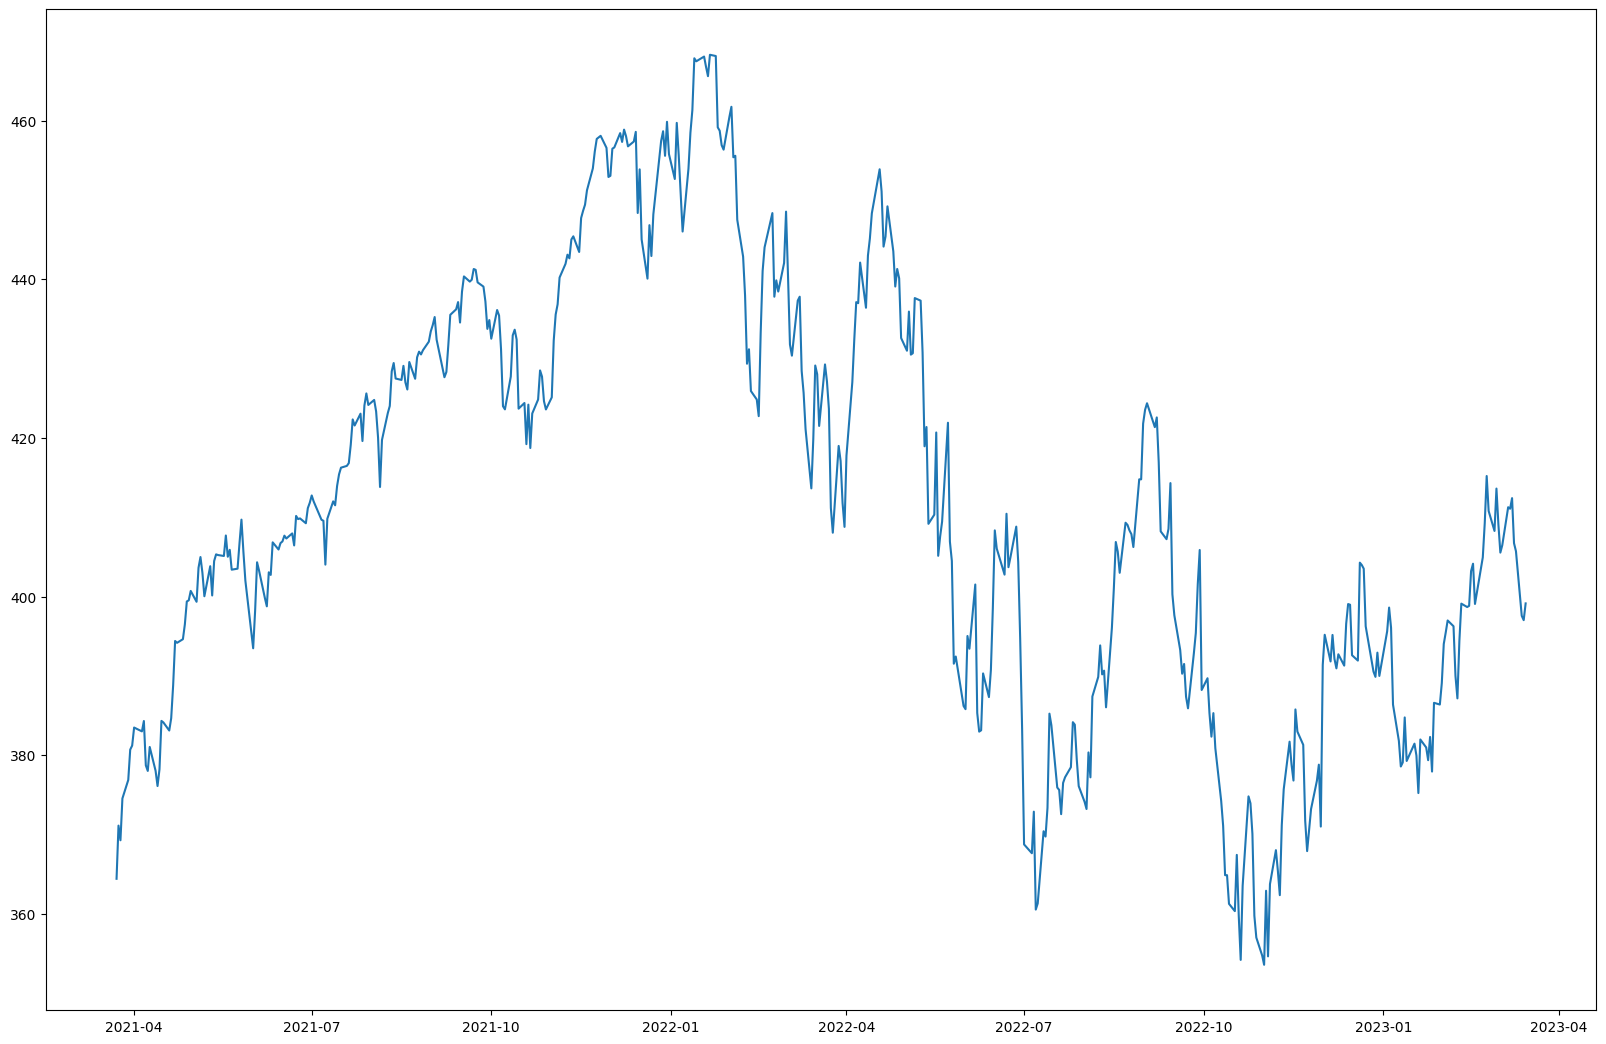

In [ ]:
plt.figure(figsize=(20,13))
plt.plot(merged_data['Close'][num_of_days:-1])

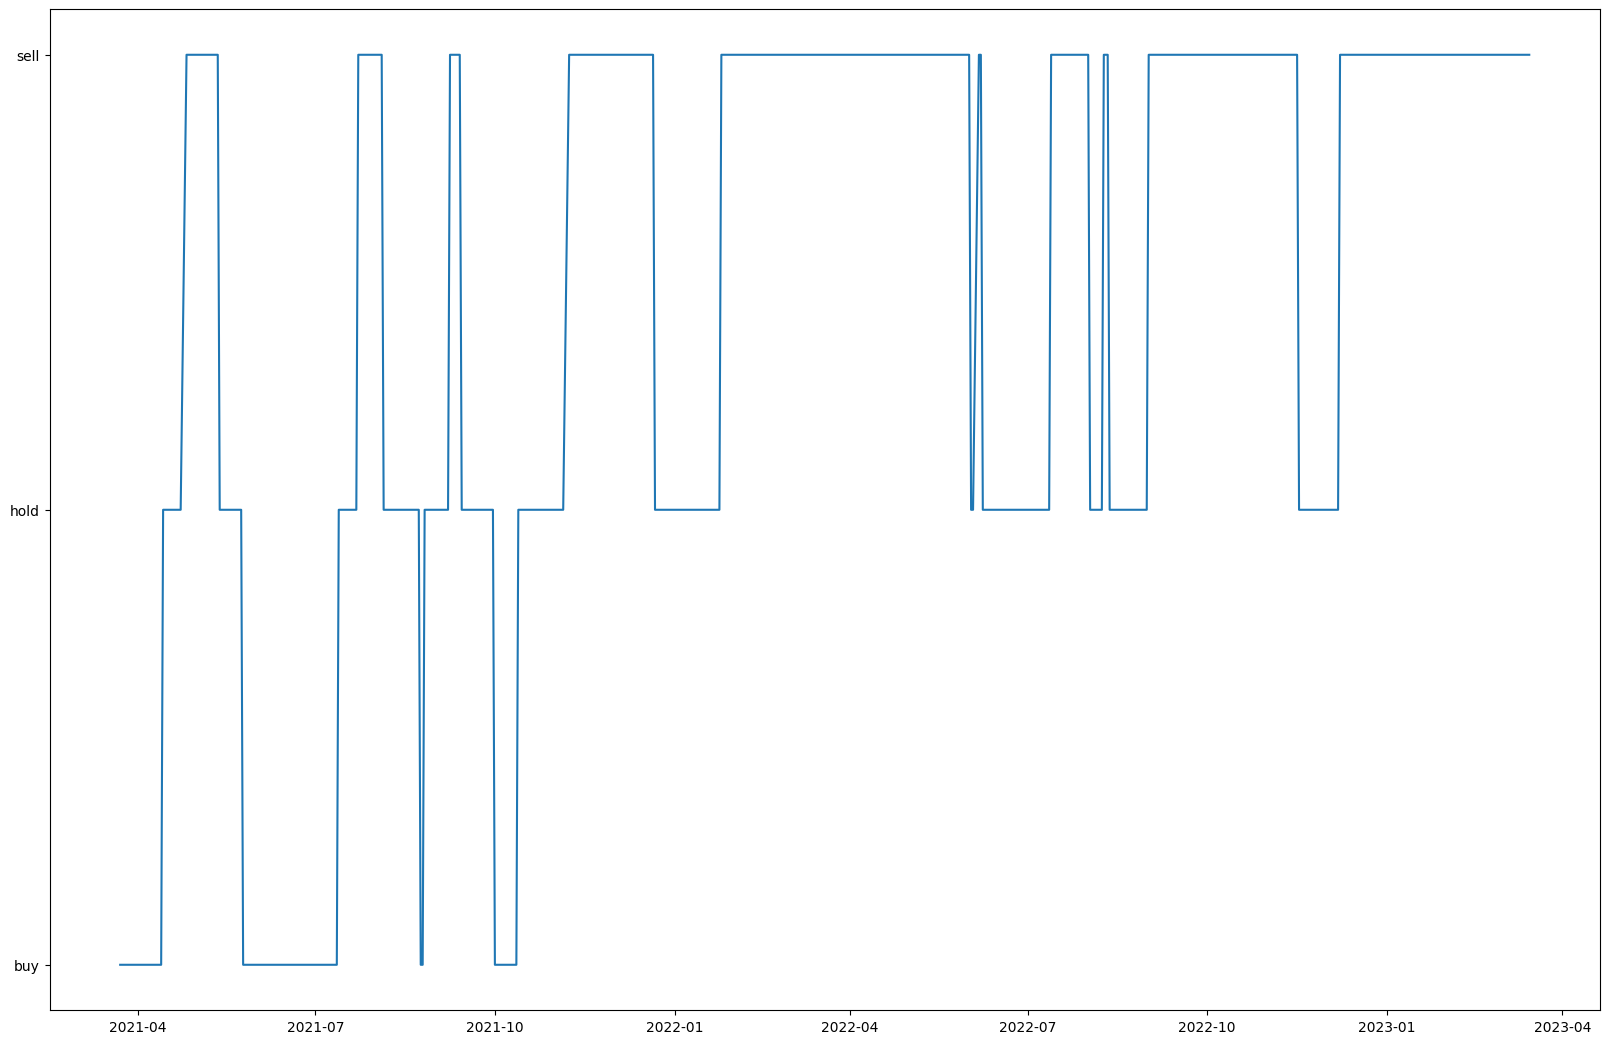

In [ ]:
plt.figure(figsize=(20,13))
plt.plot(actions_and_returns['signal'][num_of_days:-1])

In [ ]:
actions_and_returns =actions_and_returns[num_of_days:]
actions_and_returns

,Predictions,signal,Close
Date,,,
2021-03-23 00:00:00-04:00,20.0,buy,378.036102
2021-03-24 00:00:00-04:00,20.0,buy,376.114349
2021-03-25 00:00:00-04:00,20.0,buy,378.230225
2021-03-26 00:00:00-04:00,20.0,buy,384.325378
2021-03-29 00:00:00-04:00,20.0,buy,384.131256
...,...,...,...
2023-03-10 00:00:00-05:00,0.0,sell,384.442780
2023-03-13 00:00:00-04:00,0.0,sell,383.894836
2023-03-14 00:00:00-04:00,0.0,sell,390.240662


In [ ]:
model3_predictions = actions_and_returns

In [ ]:
actions_and_returns = actions_and_returns.rename(columns = {"Close": 'close'})

### Function to calculate return


In [ ]:
current_position = 'out' # can be in or out
total_return = 0.0
price_of_day_entered = 0.0

for index,day in actions_and_returns.iterrows():
  if (day['signal']== 'buy' and current_position == 'out'):
    current_position = 'in'
    price_of_day_entered = day['close']
    print(f"Entered on {index}, price: {day['close']} Total return: {total_return}")
  
  if (day['signal'] == 'sell' and current_position == 'in'):
    current_position = 'out'
    total_return = total_return + ( (day['close'] / price_of_day_entered ) * 100 ) - 100
    print(f"Sold on {index}, price: {day['close']}  Total return: {total_return} \n -------------------------------------")


#Close the position on the last day if it remains open
if (current_position == 'in'):
    current_position = 'out'
    total_return = total_return + ( ( actions_and_returns['close'].iloc[-2] / price_of_day_entered ) * 100 ) - 100
    print(f"Sold on {actions_and_returns.iloc[-1]}, price: {actions_and_returns['close'].iloc[-1]}  Total return: {total_return}")
print(f"Total return: {total_return}")


Entered on 2021-03-23 00:00:00-04:00, price: 378.0361022949219 Total return: 0.0
Sold on 2021-04-26 00:00:00-04:00, price: 405.3186340332031  Total return: 7.216911710987063 
 -------------------------------------
Entered on 2021-05-25 00:00:00-04:00, price: 405.93017578125 Total return: 7.216911710987063
Sold on 2021-07-23 00:00:00-04:00, price: 428.38848876953125  Total return: 12.749467388834404 
 -------------------------------------
Entered on 2021-08-24 00:00:00-04:00, price: 436.2075500488281 Total return: 12.749467388834404
Sold on 2021-09-08 00:00:00-04:00, price: 439.0704040527344  Total return: 13.40577285708818 
 -------------------------------------
Entered on 2021-10-01 00:00:00-04:00, price: 424.1927185058594 Total return: 13.40577285708818
Sold on 2021-11-08 00:00:00-05:00, price: 458.0801086425781  Total return: 21.394450799529253 
 -------------------------------------
Total return: 21.394450799529253


# **Investors trades Data Model**

#### **OVERVIEW**
"Insiders" are people who may have valuable private information about a company according to their states. In terms of securities trading, any director, officer or any person who owns more than 10% of a company is an insider.


An insider may trade the shares, options and RSUs that they have, but when they do that, they must fill a SEC Form 4 – Statement of Changes in Beneficial Ownership – in a 2-days period after selling or buying securities, and this information becomes available for the public. Other investors may use that information for analytics — in general, when there are a lot of transactions made by insiders recently, it can be a bullish or bearish sign.

 ### Getting the Trades Data

In [ ]:
pip install sec-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Cleaning

### Handling missing values

### Models & Predictions

### Model profits according to the Recommendations

# Combining all models

### Arraging all models prediction to be the same dates and same number of days

In [ ]:
model1_predictions= model1_predictions[-500:]
model1_predictions # Technical data

,Predictions,signal,close
Date,,,
2021-03-23 00:00:00-04:00,20.0,buy,378.036102
2021-03-24 00:00:00-04:00,20.0,buy,376.114349
2021-03-25 00:00:00-04:00,20.0,buy,378.230225
2021-03-26 00:00:00-04:00,20.0,buy,384.325378
2021-03-29 00:00:00-04:00,19.0,buy,384.131256
...,...,...,...
2023-03-10 00:00:00-05:00,0.0,sell,384.442780
2023-03-13 00:00:00-04:00,0.0,sell,383.894836
2023-03-14 00:00:00-04:00,0.0,sell,390.240662


In [ ]:
model2_predictions # Fundamnetal Data


,Predictions,signal,close
Date,,,
2021-03-23 00:00:00-04:00,0.0,sell,378.036102
2021-03-24 00:00:00-04:00,0.0,sell,376.114349
2021-03-25 00:00:00-04:00,0.0,sell,378.230225
2021-03-26 00:00:00-04:00,0.0,sell,384.325378
2021-03-29 00:00:00-04:00,0.0,sell,384.131256
...,...,...,...
2023-03-10 00:00:00-05:00,0.0,sell,384.442780
2023-03-13 00:00:00-04:00,0.0,sell,383.894836
2023-03-14 00:00:00-04:00,1.0,sell,390.240662


In [ ]:
model3_predictions # Sentimental data

,Predictions,signal,Close
Date,,,
2021-03-23 00:00:00-04:00,20.0,buy,378.036102
2021-03-24 00:00:00-04:00,20.0,buy,376.114349
2021-03-25 00:00:00-04:00,20.0,buy,378.230225
2021-03-26 00:00:00-04:00,20.0,buy,384.325378
2021-03-29 00:00:00-04:00,20.0,buy,384.131256
...,...,...,...
2023-03-10 00:00:00-05:00,0.0,sell,384.442780
2023-03-13 00:00:00-04:00,0.0,sell,383.894836
2023-03-14 00:00:00-04:00,0.0,sell,390.240662


## **Unite all models to one decision**

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# combine the predictions of the three models into a single decision
combined_predictions = pd.DataFrame()

for i in range(len(model3_predictions)):
    votes = pd.Series([model1_predictions['signal'].iloc[i], model2_predictions['signal'].iloc[i], model3_predictions['signal'].iloc[i]])
    votes = votes.unique()
    max_values = max(votes)

    if max_values == 1:  #
      combined_predictions.loc[i, 'signal'] = 'hold'
    else:
       combined_predictions.loc[i, 'signal'] = votes[0]
       print(votes[0])


In [ ]:
combined_predictions

,signal
0,buy
1,buy
2,buy
3,buy
4,buy
...,...
495,sell
496,sell
497,sell
498,sell


In [ ]:
combined_predictions.index = model1_predictions.index

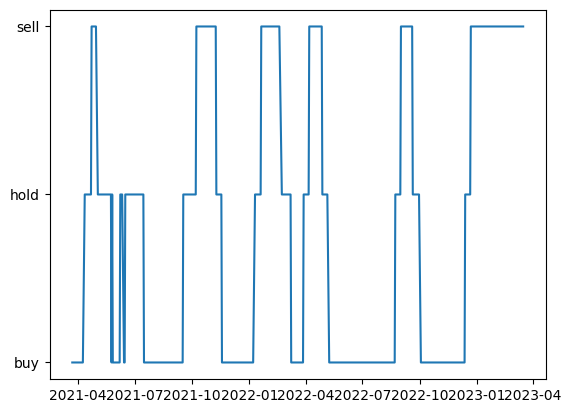

In [ ]:
plt.plot(combined_predictions['signal'])

In [ ]:
actions_and_returns = combined_predictions

In [ ]:
actions_and_returns['close'] = model2_predictions['close']

In [ ]:
current_position = 'out' # can be in or out
total_return = 0.0
price_of_day_entered = 0.0

for index,day in actions_and_returns.iterrows():
  if (day['signal']== 'buy' and current_position == 'out'):
    current_position = 'in'
    price_of_day_entered = day['close']
    print(f"Entered on {index}, price: {day['close']} Total return: {total_return}")
  
  if (day['signal'] == 'sell' and current_position == 'in'):
    current_position = 'out'
    total_return = total_return + ( (day['close'] / price_of_day_entered ) * 100 ) - 100
    print(f"Sold on {index}, price: {day['close']}  Total return: {total_return} \n -------------------------------------")


#Close the position on the last day if it remains open
if (current_position == 'in'):
    current_position = 'out'
    total_return = total_return + ( ( actions_and_returns['close'].iloc[-2] / price_of_day_entered ) * 100 ) - 100
    print(f"Sold on {actions_and_returns.iloc[-1]}, price: {actions_and_returns['close'].iloc[-1]}  Total return: {total_return}")
print(f"Total return: {total_return}")


Entered on 2021-03-23 00:00:00-04:00, price: 378.0361022949219 Total return: 0.0
Sold on 2021-04-23 00:00:00-04:00, price: 404.47430419921875  Total return: 6.993565361562034 
 -------------------------------------
Entered on 2021-05-25 00:00:00-04:00, price: 405.93017578125 Total return: 6.993565361562034
Sold on 2021-10-08 00:00:00-04:00, price: 427.72894287109375  Total return: 12.363643367684645 
 -------------------------------------
Entered on 2021-11-18 00:00:00-05:00, price: 458.861572265625 Total return: 12.363643367684645
Sold on 2022-01-20 00:00:00-05:00, price: 437.9465026855469  Total return: 7.805608691385615 
 -------------------------------------
Entered on 2022-03-09 00:00:00-05:00, price: 418.9876403808594 Total return: 7.805608691385615
Sold on 2022-04-07 00:00:00-04:00, price: 441.2933654785156  Total return: 13.129327805720436 
 -------------------------------------
Entered on 2022-05-09 00:00:00-04:00, price: 391.536376953125 Total return: 13.129327805720436
Sold 

In [ ]:
no_sell_return = (model3_predictions.iloc[499]['Close'] / model3_predictions.iloc[0]['Close'] )*100

In [ ]:
no_sell_return

104.38261610284636

In [ ]:
no_sell_return = no_sell_return - 100

In [ ]:
print(f"The profit ratio is: {total_return/no_sell_return}")

The profit ratio is: 3.9806246071678797
